<a href="https://colab.research.google.com/github/nestorpalacios/MVP1/blob/main/MVP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISIS DE PRODUCCION DE POZOS DE PETROLEO Y GAS**

## **1. INTRODUCCION**

Los campos de petroleo y gas generan energia que mueve el mundo, alrededor de planeta existen muchos campos produciendo desde muchos años atras. sin embargo, para optimizar la produccion de estos campos es necesaria la toma de información para poder conocer mejor y estimar el comportamiento productivo de los pozos.

Si bien la tecnologia de hoy en dia nos ayuda a mitigar muchos riesgos, existen muchos campos que tienen una amplia historia de producción (por ejemplo que producen desde el año 1960) sin embargo la gran mayoria de estos  pozos no cuentan con información adicional a la historia de produccion para realizar analisis e estimaciones.

El Dataset que se va a trabajar representa la historia de produccion de un campo de Petroleo y Gas de Peru, que se encuentra en una zona en donde los reservorios de petroleo (formaciones geologicas que cuentan con propiedades de almacenamiento de hidrocarburos) poseen calidades de roca pobres (baja capacidad de flujo, la cual depende de variables intrinsecas como la permeabilidad. Sin embargo para estimar esta permeabilidad es necesario correr unos registros de pozo especiales, estos registros no han sido corridos en este campo debido a que las bajas producciones de estos pozos no justifican la adquisicion de esta informacion debido a su costo).

En este campo se cuenta 2 zonas productivas: Arena A y Arena B, cuando estas se producen al mismo tiempo se denomina Arena C. Se cuenta con diversos pozos, algunos muy antiguos y otros muy recientes, y es muy variable la cantidad de pozos que producen de las 2 arenas al mismo tiempo.

## **2. DEFINICION DEL PROBLEMA**

### **2.1 Qual é a descrição do problema?**
       
*   Entender el comportamiento productivo de las formaciones productivas de petroleo en el campo a revisar.
*   Observar si existe una relacion entre al acumulado de produccion de los tipos de ajuste de curva a encontrar.

### **2.2 Este é um problema de aprendizado supervisionado ou não supervisionado?**

*   Se va a realizar un analisis de aprendizaje supervisado porque se van a realizar regresiones para analisis el comportamiento productivo de los pozos.
* Se va a realizar un analisis no supervisado para realizar un cluster plot con los datos resultantes de las curvas tipo ajustadas.


### **2.3 Que premissas ou hipóteses você tem sobre o problema?**

*   Comunmente para analizar el comportamiento productivo de estos pozos se utilizas las curvas de declinacion de Arps (estas pueden ser exponenciales, hiperbolicas e armonicas. Sin embargo las armonicas no son utilizadas debido a la sobreestimacion que generan). Se presume que algunos pozos puedan tener un mejor ajuste del comportamiento productivo usando curvas de Duong (que son utilizadas para campos de shale gas en USA) debido a que estos campos tienen permeabilidades bajas similares al campo a analizar.

*   Se prevee que algunas areas puedan tener un mejor ajuste hacia diversos tipos de curvas de ajuste, con lo cual podriamos determinar cual podria el posible resultado productivo de perforar mas pozos en dicha zona.

### **2.4 Que restrições ou condições foram impostas para selecionar os dados?**

*   Este dataset a importar se basa en 2 tablas que estan relacionadas entre si, debido a que una de ellas tiene las caracteristicas estaticas de los pozos y la otra cuenta solo con la informacion de produccion del campo.

### **2.5 Defina cada um dos atributos do dataset.** 

* El Dataset es un archivo de access, que cuenta con diversas tablas. Para el analisis se ha utilizado e importado al Github 2 tablas, las cuales son:

*   **masterwell.csv :** Contiene la informacion estatica del campo
  * Completion : zona productora asocada a cada pozo (texto)
  * Wellbore   : cabezal del pozo(texto)
  * xcoor      : coordenas en x de cada pozo (unidades de metros)
  * ycoor      : coordenas en x de cada pozo (unidades de metros)
  * Avg_depth  : profundidad promedio de las arenas (unidades de pies)
  * Sand       : arena o zona productora (texto)
  * Station    : estacion recolectora de fluidos (texto)

* **prdWell.csv :** Contiene la historia de produccion por completacion
  * DATE             : fecha en formato d/mm/yyyy
  * Completion       : zona productora asocada a cada pozo (texto)
  * pet              : Produccion mensual de petroleo (unidades en barriles)
  * gas              : Produccion mensual de gas (unidades en Miles de pies cubicos)
  * agua             : Produccion mensual de agua (unidades en barriles)
  * FirstDate        : Primer dia de produccion por pozo (unidad de fecha)
  * ProdTotalDaysCum : Cantidad de dias producidos por pozo por fecha (unidades numericas)

En la siguiente imagen superior se puede observar cual es la estructura de datos y como viene la produccion asociada a las arenas.

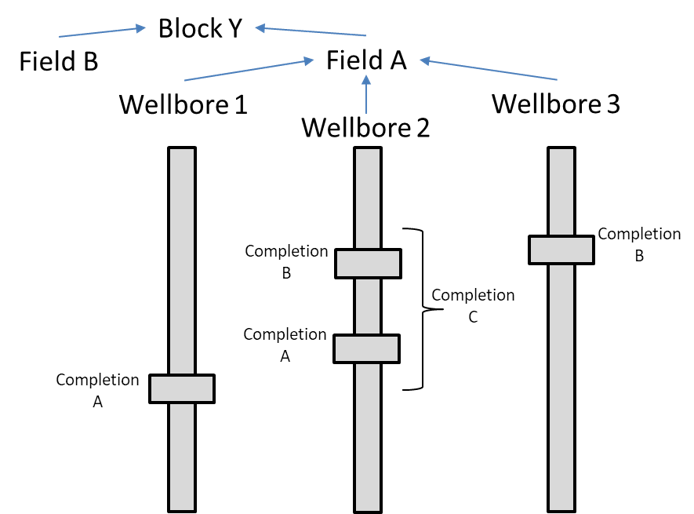


##**3. CARGA DE DADOS**

### *3.1 Carregamento de bibliotecas usadas*

In [37]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## Carrega bibliotecas utilizadas

import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
from scipy.optimize import curve_fit
import missingno as ms
import seaborn as sns


### *3.2 Carga do Dataset*

In [38]:
# carga do dataset através de um arquivo
filename1 = 'https://raw.githubusercontent.com/nestorpalacios/MVP1/main/masterwell.csv' # arquivo fica no Github
filename2 = 'https://raw.githubusercontent.com/nestorpalacios/MVP1/main/prdWell.csv' #  arquivo fica no Github
masterwell = pd.read_csv(filename1)
prodwell = pd.read_csv(filename2, parse_dates=['DATE'], dayfirst=True) # dentro dos dados estamos formatando a coluna de data
# verifica o tipo de prodwell e masterwell
print(type(masterwell))
print(type(prodwell))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


##**4. ANALISE DE DADOS**

### *4.1 masterwell Dataset*





#### *4.1.1 Estadistica Descritiva do masterwell Dataset*

Vamos examinar as dimensões do dataset, suas informações e linhas.

In [39]:
# Mostra as dimensões do dataset
print(masterwell.shape)

(44, 7)


In [40]:
# as informações do Dataset tabela são exibidas
masterwell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Completion  44 non-null     object 
 1   Wellbore    44 non-null     object 
 2   xcoor       44 non-null     float64
 3   ycoor       44 non-null     float64
 4   Avg_depth   33 non-null     float64
 5   Sand        44 non-null     object 
 6   Station     44 non-null     object 
dtypes: float64(3), object(4)
memory usage: 2.5+ KB


Aqui podemos observar que existen 44 datos cargados en casi todas las columnas menos en la columna "Avg_depht", vamos a realizar un analisis de los datos a mayor detalle para entenderlos.

#### *4.1.2 Pre-processamento inicial do masterwell Dataset*
Tratamento de valores missings (faltantes) e limpeza de dados.

<Axes: >

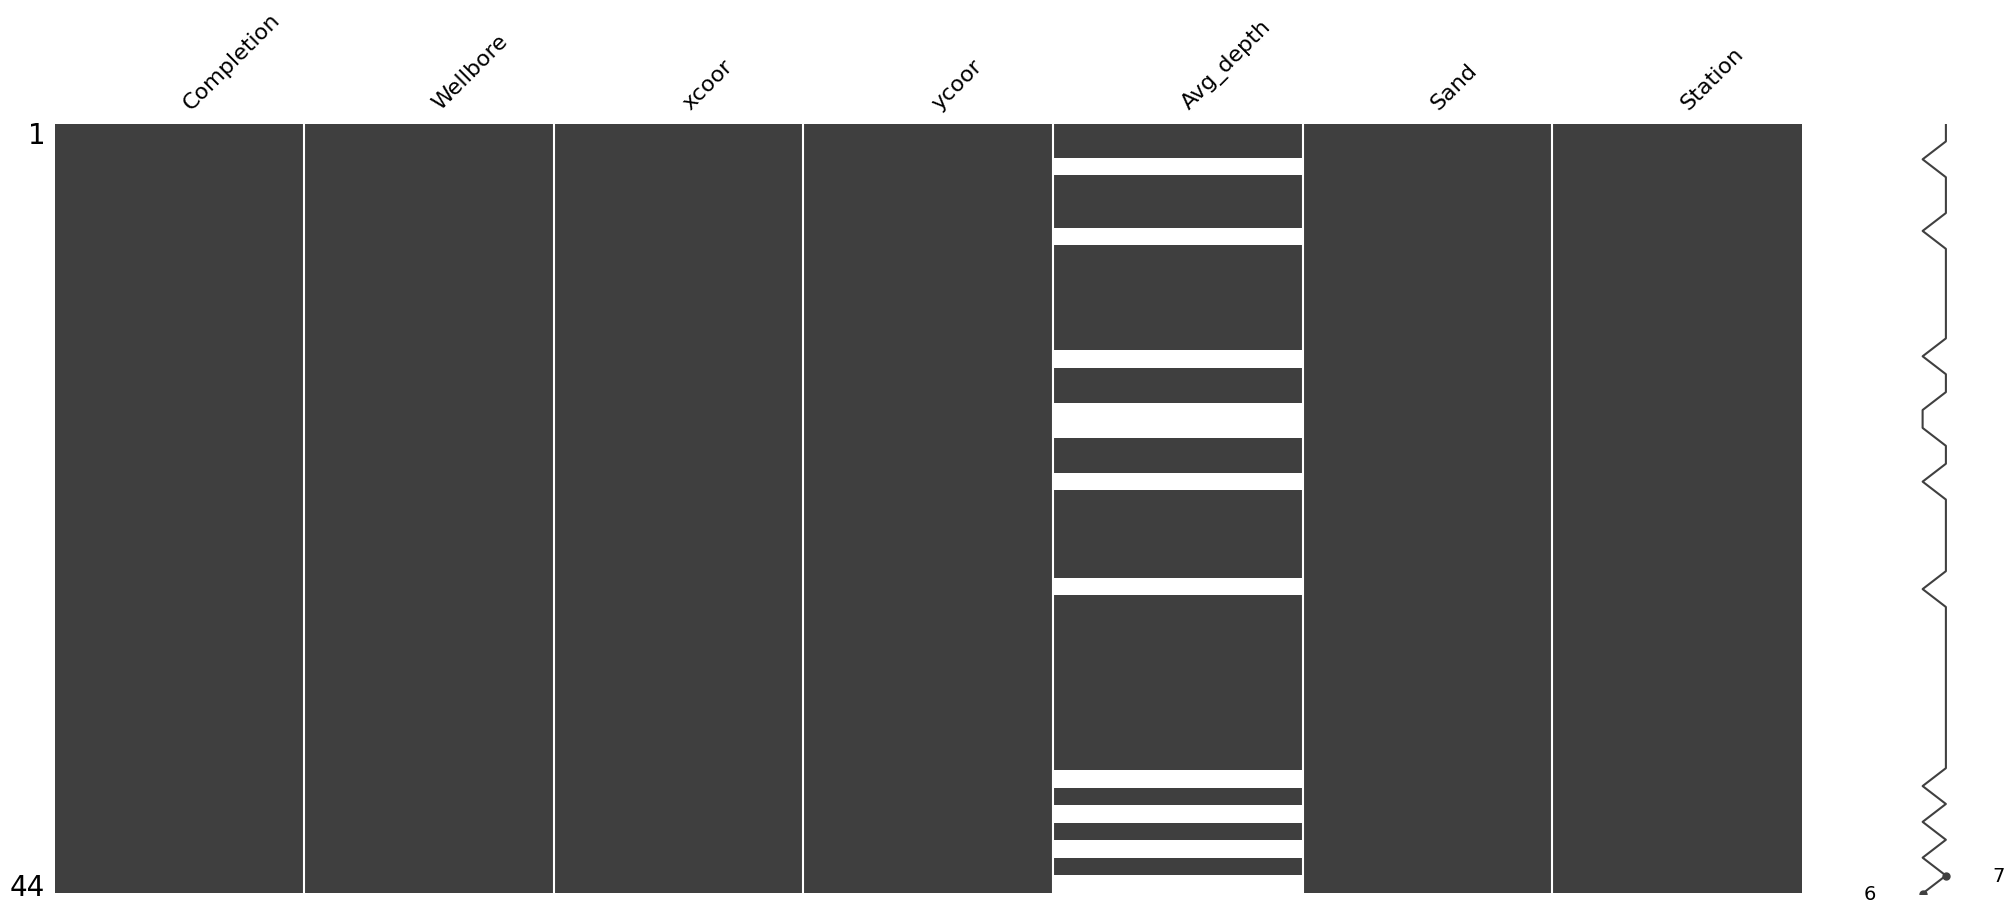

In [41]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(masterwell.columns)

# o novo dataset irá conter todas as colunas do dataset original
masterwellSemMissings = masterwell[col[:]]

# substituindo os zeros por NaN
masterwellSemMissings.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(masterwellSemMissings)

In [42]:
# verificando null no dataset
masterwellSemMissings.isnull().sum()

Completion     0
Wellbore       0
xcoor          0
ycoor          0
Avg_depth     11
Sand           0
Station        0
dtype: int64

Observamos que hay 11 datos que no tienen valores en la columna "Avg_depth", vamos a observar a que valores estan relacionados estos datos.

#### *4.1.3 Visualizações do masterwell Dataset*
Vamos criar agora um scatter plot do localicao dos pocos.  Tambem a histograma para Avg_depth do dataset. 

In [43]:
#Localização dos poços - Field A
fig=px.scatter(masterwell,x="xcoor", y="ycoor", width=1000, height=800,
           labels={
                     "xcoor": "Coordenadas X (m)",
                     "ycoor": "Coordenadas Y (m)",
                 },
                title="Localização dos poços - Field A", text="Wellbore")

fig.update_traces(textposition="bottom center")
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_layout(plot_bgcolor='white',
                  title_x=0.5)
fig.show()

In [44]:
fig=px.scatter(masterwell,x="xcoor", y="ycoor", color= "Sand", width=1000, height=800,
           labels={
                     "xcoor": "Coordenadas X (m)",
                     "ycoor": "Coordenadas Y (m)",
                     "Sand": "Zona Produtora"
                 },
                title="Localização dos poços pelo Zona Produtora - Field A", text="Wellbore")


fig.update_traces(textposition="bottom center")
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_layout(plot_bgcolor='white',
                  title_x=0.5)
fig.show()

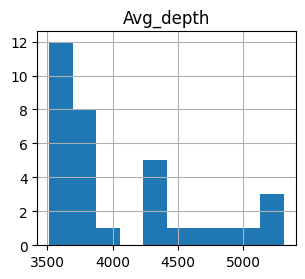

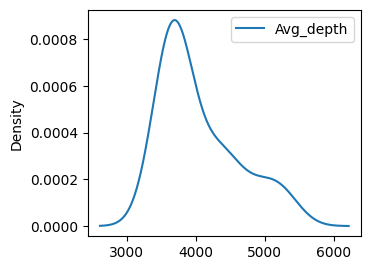

In [45]:
# Histograma
masterwellSemMissings.hist(column = "Avg_depth", figsize = (12,10), layout = (3,3))
plt.show()

# Density Plot
masterwellSemMissings.plot(y = "Avg_depth", kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (12,10))
plt.show()

Aqui podemos observar que los valores de "Avg_depth" son mayores 0, a excepcion de los que son null. Vamos a transformar el dataset para observar a que variables estan asociadas estas.

#### *4.1.4 Pre-processamento final do masterwell Dataset*
Tratamento de valores missings (faltantes) e limpeza de dados.

<Axes: >

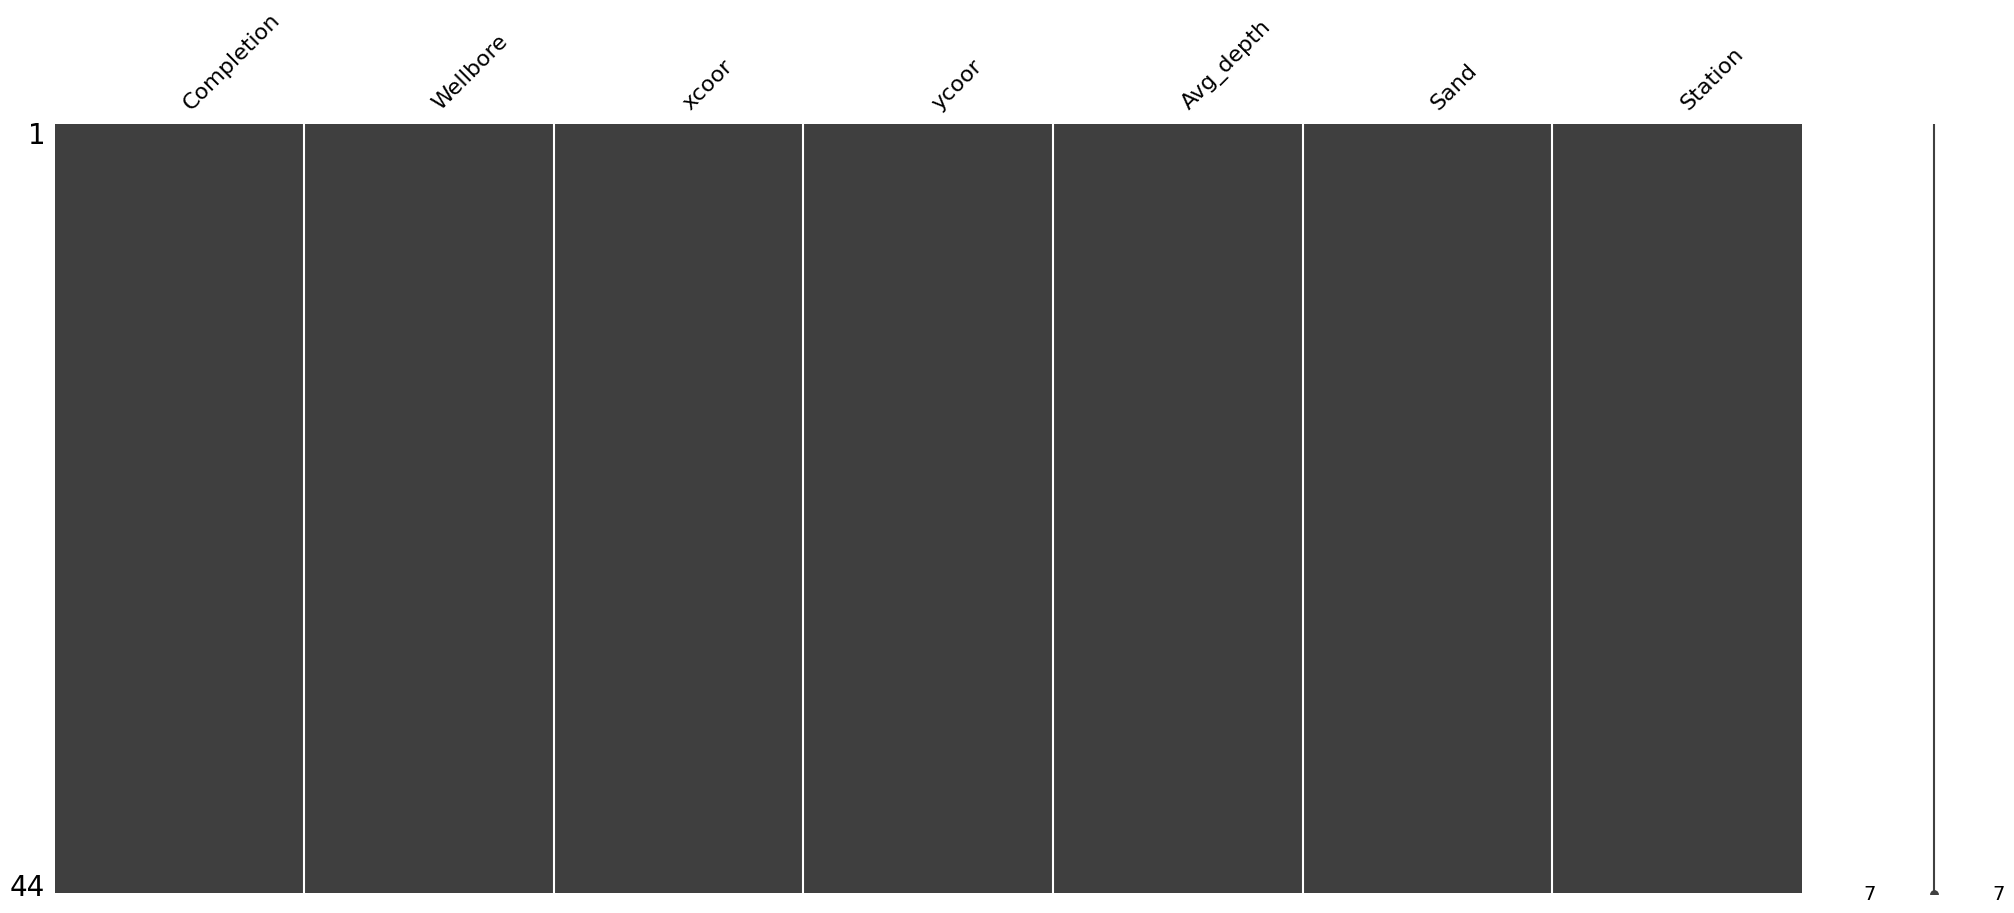

In [46]:
# substituindo os NaN de 'Avg_depth' por 0 - voltando aos valores originais destas colunas
masterwellSemMissings['Avg_depth'].fillna(0, inplace=True)
# exibindo visualização matricial da nulidade do dataset
ms.matrix(masterwellSemMissings)

Ahora que ya no hay valores null en la columna "Avg_depth", vamos a ver los valores que fueron cambiados a 0.

In [47]:
mwf = masterwellSemMissings
avgf = mwf[(mwf.Avg_depth == 0.0)]
avgf

Completion Wellbore      xcoor        ycoor  Avg_depth Sand Station
2     AL-10:C    AL-10  478268.42  10850586.12        0.0    C   LB-03
6     AL-13:C    AL-13  477848.00  10849130.34        0.0    C   LB-03
13     AL-2:C     AL-2  478677.08  10851104.82        0.0    C   LB-03
16    AL-21:C    AL-21  479065.16  10850480.10        0.0    C   LB-04
17    AL-22:C    AL-22  477649.06  10848633.30        0.0    C   LB-03
20    AL-25:C    AL-25  477242.36  10848889.80        0.0    C   LB-03
26     AL-3:C     AL-3  479019.10  10850841.48        0.0    C   LB-03
37     AL-6:C     AL-6  477547.14  10849580.64        0.0    C   LB-03
39     AL-7:C     AL-7  478157.68  10850185.98        0.0    C   LB-03
41     AL-8:C     AL-8  478409.54  10849866.78        0.0    C   LB-03
43     AL-9:C     AL-9  478205.70  10849500.84        0.0    C   LB-03

Aqui podemos observar que todas los valores que eran null y ahora son 0, pertenecen a la Arena C. Lo cual tiene logica, debido a que la Arena C es el estado productivo en donde Arena A y Arena B se encuentran produciendo al mismo tiempo. Por lo cual no seria logico usar un promedio o la media de estas arenas para llenar estos valores debido a que al tratarse de formaciones diferentes.

### *4.2 prodwell Dataset*###


#### *4.2.1 Estadistica Descritiva do prodwell Dataset*
Vamos examinar as dimensões do dataset, suas informações e linhas.

In [48]:
# Mostra as dimensões do dataset
print(prodwell.shape)

(6791, 7)


In [49]:
# as informações da tabela são exibidas
prodwell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6791 entries, 0 to 6790
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              6791 non-null   datetime64[ns]
 1   Completion        6791 non-null   object        
 2   pet               6470 non-null   float64       
 3   gas               5793 non-null   float64       
 4   agua              5059 non-null   float64       
 5   FirstDate         6791 non-null   object        
 6   ProdTotalDaysCum  6791 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 371.5+ KB


#### *4.2.2 Pre-processamento do prodwell Dataset*
Tratamento de valores missings (faltantes) e limpeza de dados.

<Axes: >

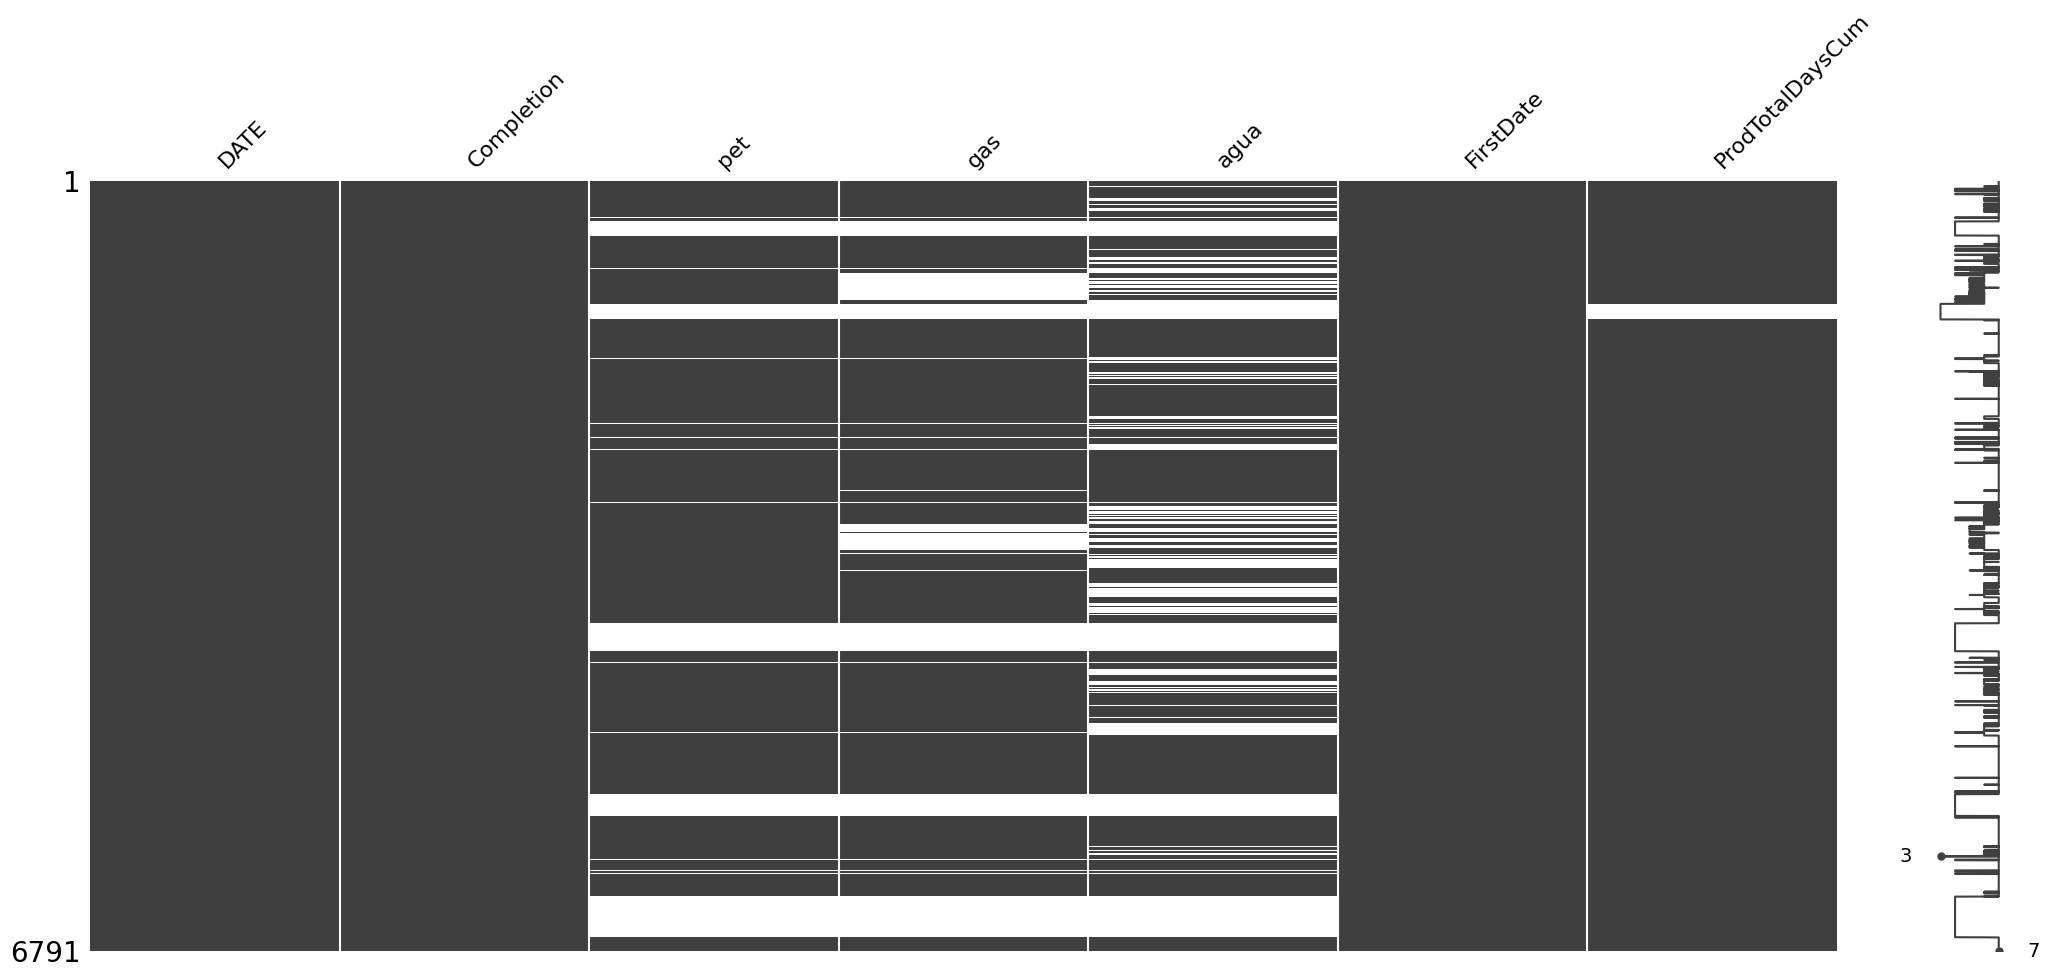

In [50]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(prodwell.columns)

# o novo dataset irá conter todas as colunas do dataset original
prodwellSemMissings = prodwell[col[:]]

# substituindo os zeros por NaN
prodwellSemMissings.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(prodwellSemMissings)

In [51]:
prodwellSemMissings.isnull().sum()

DATE                   0
Completion             0
pet                 1192
gas                 1657
agua                2475
FirstDate              0
ProdTotalDaysCum     139
dtype: int64

Como es un Dataset de produccion y nos vamos a enfocar al comportamiento productivo de los pozos, vamos a descartar las columnas de gas y agua debido a que estos fluidos vienen asociados a la produccion de petroleo

<Axes: >

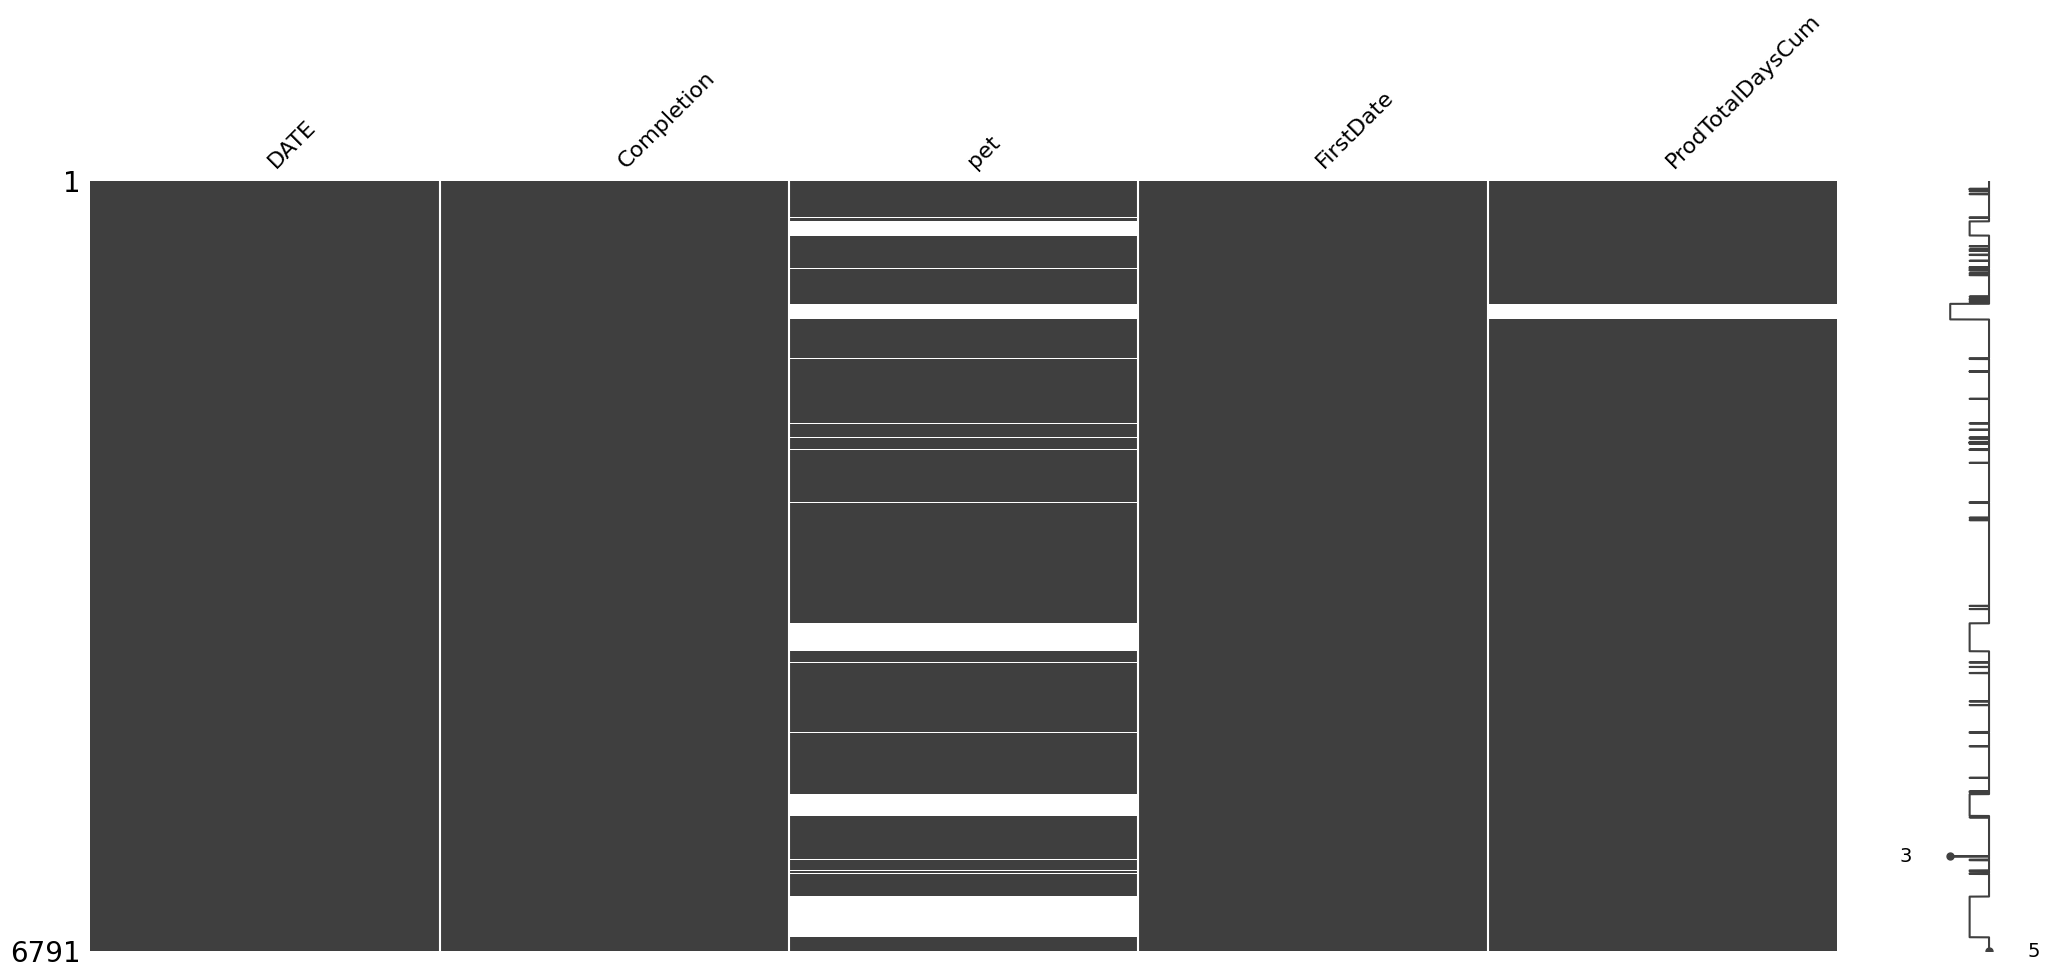

In [52]:
# removendo as colunas 'gas' e 'agua'
prodwellSemMissings.drop(['gas', 'agua'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(prodwellSemMissings)
     

Debido a que se tiene una gran cantidad de pozos con diversas producciones en diversos tiempos, asignar 0 a los valores null podria afectar al ajuste de curva que se va a realizar mas adelante. Por lo cual se va a transformar este dataframe para vizualizar los graficos.

In [53]:
# pivot_table para cambiar estructura de la tabla
prdwellfix = pd.pivot_table(prodwellSemMissings, index = ['DATE'] , columns = 'Completion', values = 'pet') 
prdwellfix.head()

Completion  AL-10:A  AL-10:C  AL-11:B  AL-12:B  AL-13:A  AL-13:C  AL-14:B  \
DATE                                                                        
1964-04-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1964-05-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1964-06-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1964-07-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1964-08-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

Completion  AL-15:A  AL-16:B  AL-17:B  ...  AL-4:A  AL-5:A  AL-6:A  AL-6:C  \
DATE                                   ...                                   
1964-04-01      NaN      NaN      NaN  ...     NaN     NaN     NaN     NaN   
1964-05-01      NaN      NaN      NaN  ...     NaN     NaN     NaN     NaN   
1964-06-01      NaN      NaN      NaN  ...     NaN     NaN     NaN     NaN   
1964-07-01      NaN      NaN      NaN  ...     NaN     NaN     NaN     NaN   
1964-08-01      NaN      NaN      NaN  ...     NaN     NaN     NaN     NaN   

Completion  AL-7:A  AL-7:C  AL-8:A  AL-8:C  AL-9:A  AL-9:C  
DATE                                                        
1964-04-01     NaN     NaN     NaN     NaN     NaN     NaN  
1964-05-01     NaN     NaN     NaN     NaN     NaN     NaN  
1964-06-01     NaN     NaN     NaN     NaN     NaN     NaN  
1964-07-01     NaN     NaN     NaN     NaN     NaN     NaN  
1964-08-01     NaN     NaN     NaN     NaN     NaN     NaN  

[5 rows x 44 columns]

In [54]:
#dar formato a los nombres de la columna
prdwellfix.columns = ['_'.join(str(s).strip() for s in col if s) for col in prdwellfix.columns]

#resetear el index
prdwellfix.reset_index(inplace=True)

#ver la tabla pivot arreglada
prdwellfix.head()

DATE  A_L_-_1_0_:_A  A_L_-_1_0_:_C  A_L_-_1_1_:_B  A_L_-_1_2_:_B  \
0 1964-04-01            NaN            NaN            NaN            NaN   
1 1964-05-01            NaN            NaN            NaN            NaN   
2 1964-06-01            NaN            NaN            NaN            NaN   
3 1964-07-01            NaN            NaN            NaN            NaN   
4 1964-08-01            NaN            NaN            NaN            NaN   

   A_L_-_1_3_:_A  A_L_-_1_3_:_C  A_L_-_1_4_:_B  A_L_-_1_5_:_A  A_L_-_1_6_:_B  \
0            NaN            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN            NaN   
2            NaN            NaN            NaN            NaN            NaN   
3            NaN            NaN            NaN            NaN            NaN   
4            NaN            NaN            NaN            NaN            NaN   

   ...  A_L_-_4_:_A  A_L_-_5_:_A  A_L_-_6_:_A  A_L_-_6_:_C  A_L_-_7_:_A  \
0  ...          NaN          NaN          NaN          NaN          NaN   
1  ...          NaN          NaN          NaN          NaN          NaN   
2  ...          NaN          NaN          NaN          NaN          NaN   
3  ...          NaN          NaN          NaN          NaN          NaN   
4  ...          NaN          NaN          NaN          NaN          NaN   

   A_L_-_7_:_C  A_L_-_8_:_A  A_L_-_8_:_C  A_L_-_9_:_A  A_L_-_9_:_C  
0          NaN          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN          NaN  

[5 rows x 45 columns]

In [55]:
#Editar los nombres de las columnas de la tabla pivot
prdwellfix.columns = prdwellfix.columns.str.replace('[_]','')
prdwellfix.head()

DATE  AL-10:A  AL-10:C  AL-11:B  AL-12:B  AL-13:A  AL-13:C  AL-14:B  \
0 1964-04-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1 1964-05-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2 1964-06-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3 1964-07-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4 1964-08-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   AL-15:A  AL-16:B  ...  AL-4:A  AL-5:A  AL-6:A  AL-6:C  AL-7:A  AL-7:C  \
0      NaN      NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1      NaN      NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2      NaN      NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3      NaN      NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4      NaN      NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

   AL-8:A  AL-8:C  AL-9:A  AL-9:C  
0     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN  
3     NaN     NaN     NaN     NaN  
4     NaN     NaN     NaN     NaN  

[5 rows x 45 columns]

In [56]:
# ver la descripcion la tabla pivot arreglada
prdwellfix.describe()

AL-10:A     AL-10:C      AL-11:B      AL-12:B      AL-13:A  \
count    145.000000   70.000000    50.000000   421.000000    31.000000   
mean    2102.572414  280.800000   807.300000   174.463183  1066.193548   
std     1568.716048   95.023353   353.357612   302.123204   912.075853   
min      518.000000  124.000000   225.000000    10.000000    83.000000   
25%     1091.000000  214.250000   602.750000    27.000000   653.000000   
50%     1559.000000  265.000000   742.000000    52.000000   822.000000   
75%     2666.000000  336.500000   980.750000   142.000000  1086.000000   
max    11603.000000  590.000000  2041.000000  2223.000000  4871.000000   

           AL-13:C       AL-14:B      AL-15:A     AL-16:B      AL-17:B  ...  \
count   314.000000    262.000000   265.000000   77.000000    55.000000  ...   
mean    487.394904    730.488550   658.237736  192.597403   380.981818  ...   
std     146.848023   1018.153383   568.981040  163.864053   204.145780  ...   
min     244.000000    108.000000    87.000000   26.000000    76.000000  ...   
25%     401.250000    214.000000   343.000000   78.000000   256.500000  ...   
50%     440.000000    339.000000   461.000000   95.000000   326.000000  ...   
75%     539.500000    842.250000   719.000000  306.000000   427.000000  ...   
max    1164.000000  10405.000000  3274.000000  696.000000  1136.000000  ...   

            AL-4:A        AL-5:A       AL-6:A        AL-6:C        AL-7:A  \
count   138.000000     68.000000    50.000000    545.000000     64.000000   
mean   1406.144928   5292.529412  2827.120000   1057.583486   2024.890625   
std    1060.732322   3327.937627  1459.163762   1553.094989   1824.579848   
min     132.000000   1286.000000  1239.000000     51.000000    240.000000   
25%     726.750000   3080.500000  1879.750000    225.000000   1129.500000   
50%    1044.000000   4709.500000  2603.000000    417.000000   1622.500000   
75%    1668.000000   6462.250000  3440.750000   1097.000000   2128.000000   
max    6180.000000  20947.000000  9500.000000  12742.000000  11381.000000   

            AL-7:C       AL-8:A       AL-8:C       AL-9:A      AL-9:C  
count   262.000000    92.000000   292.000000    43.000000  122.000000  
mean    246.148855  2767.402174   443.845890   985.465116  132.680328  
std     113.775796  1738.783610   280.857426   585.566041   34.725908  
min      64.000000   436.000000   120.000000   290.000000   66.000000  
25%     171.000000  1469.500000   258.750000   669.500000  112.000000  
50%     220.500000  2309.000000   357.000000   823.000000  128.500000  
75%     298.000000  3575.000000   524.250000  1087.500000  149.000000  
max    1087.000000  7315.000000  1934.000000  3291.000000  313.000000  

[8 rows x 44 columns]

In [57]:
#ver los tipos de data de las columnas
prdwellfix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 45 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     703 non-null    datetime64[ns]
 1   AL-10:A  145 non-null    float64       
 2   AL-10:C  70 non-null     float64       
 3   AL-11:B  50 non-null     float64       
 4   AL-12:B  421 non-null    float64       
 5   AL-13:A  31 non-null     float64       
 6   AL-13:C  314 non-null    float64       
 7   AL-14:B  262 non-null    float64       
 8   AL-15:A  265 non-null    float64       
 9   AL-16:B  77 non-null     float64       
 10  AL-17:B  55 non-null     float64       
 11  AL-18:B  113 non-null    float64       
 12  AL-19:B  63 non-null     float64       
 13  AL-1:A   198 non-null    float64       
 14  AL-20:B  65 non-null     float64       
 15  AL-21:A  112 non-null    float64       
 16  AL-21:C  107 non-null    float64       
 17  AL-22:C  291 non-null    float64   

<Axes: >

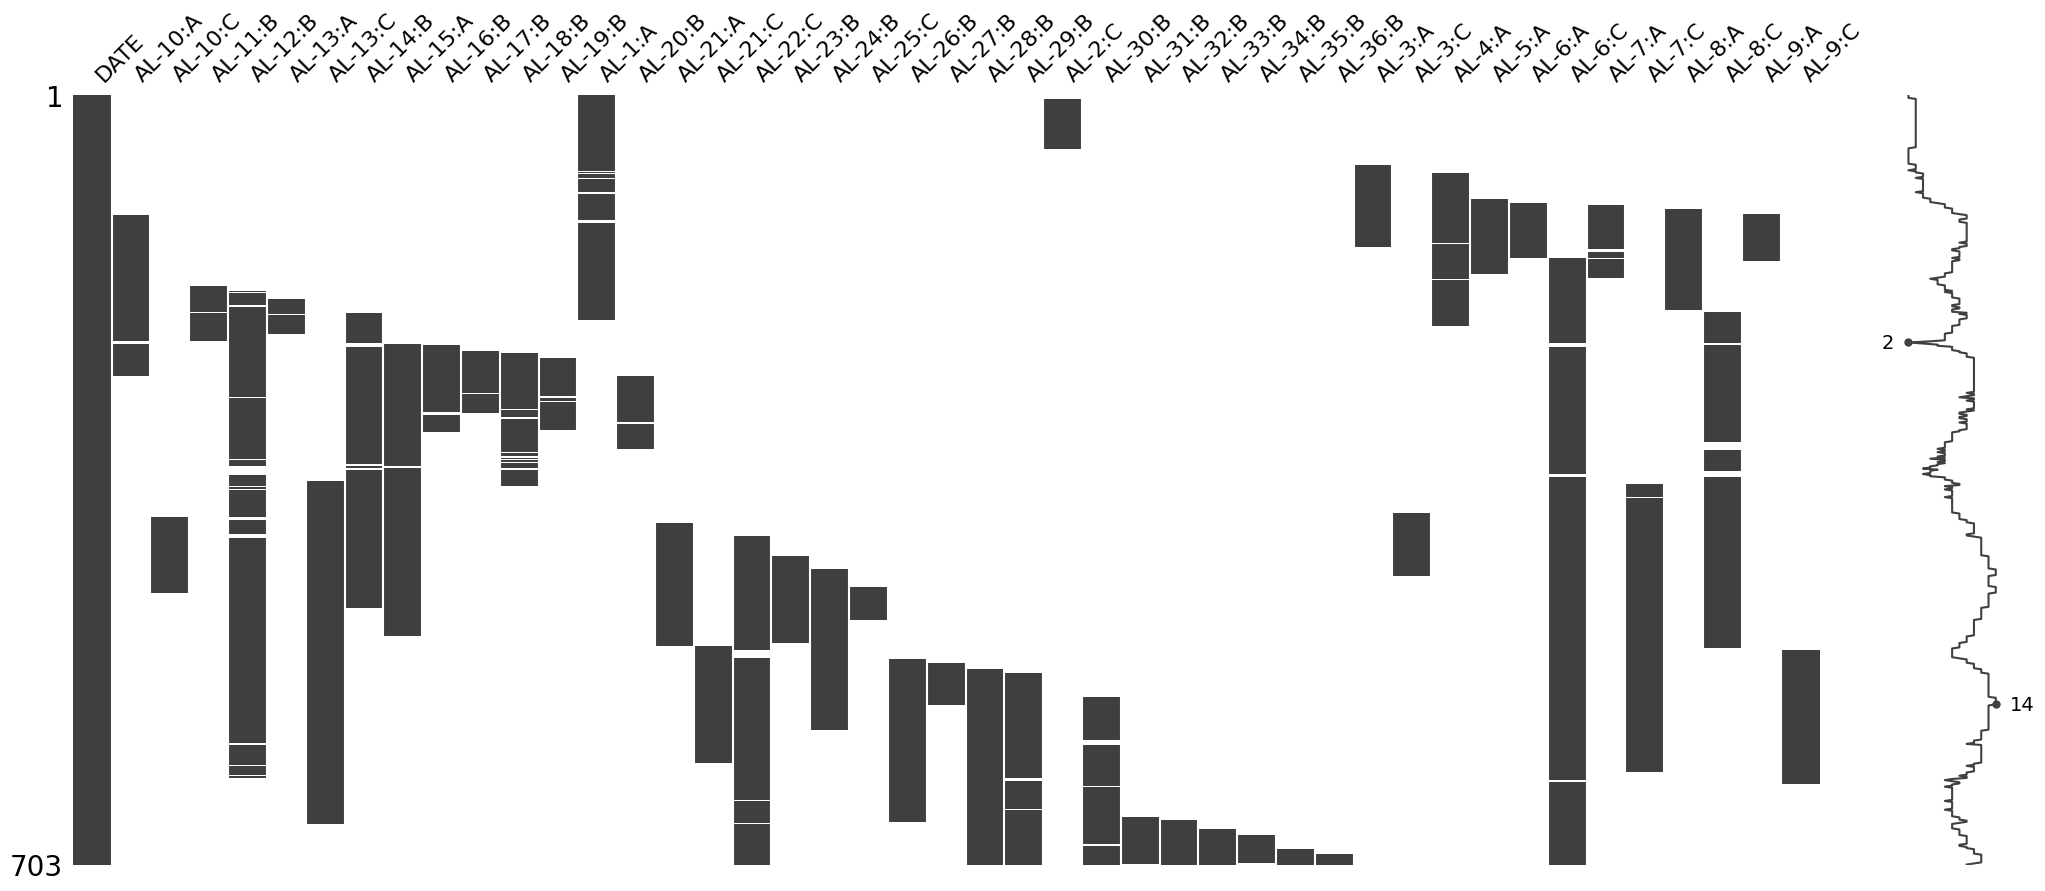

In [58]:
#ver matrix null
prdf= prdwellfix
ms.matrix(prdf)

Se puede observar aqui cual es la secuencia de entrada de pozos en el tiempo, pudiendo observar cuales son los primeros pozos, los ultimos pozos y cuanto tiempo estuvieron produciendo.

#### *4.2.3 Visualizações do prodwell Dataset*
A seguir veremos os gráficos de produção de todas as Completaciones. 

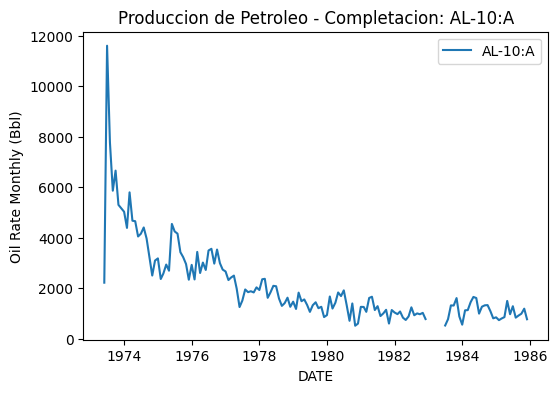

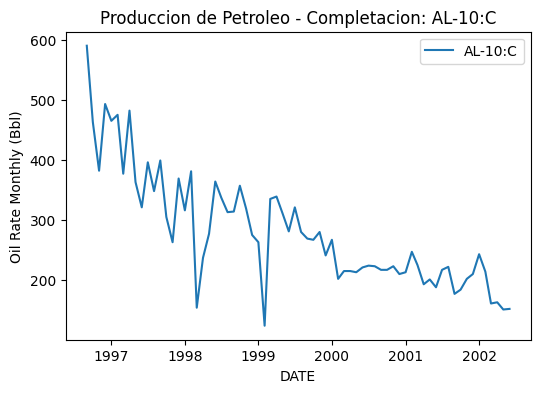

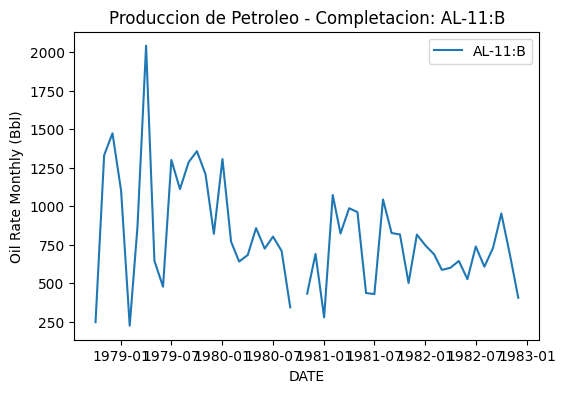

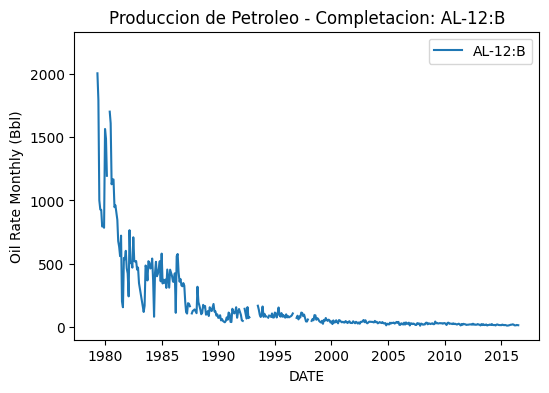

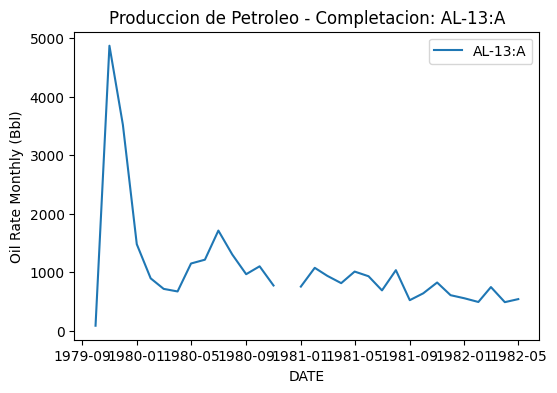

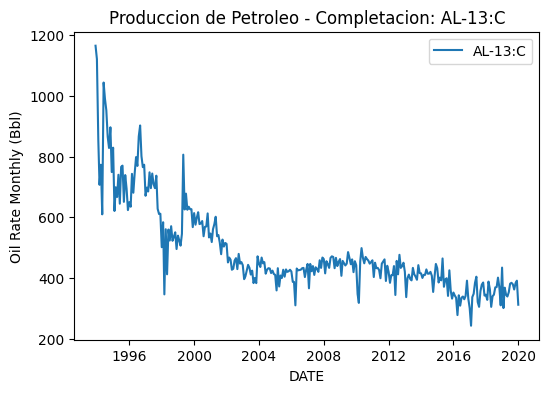

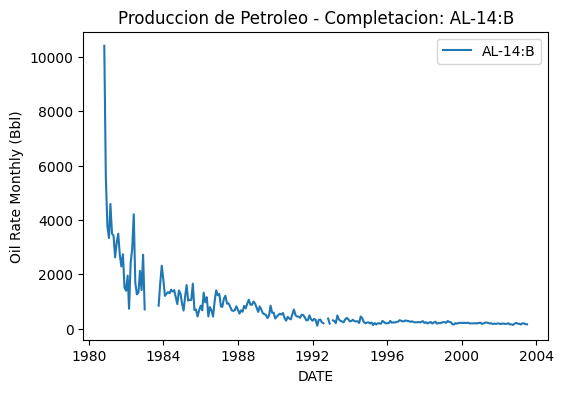

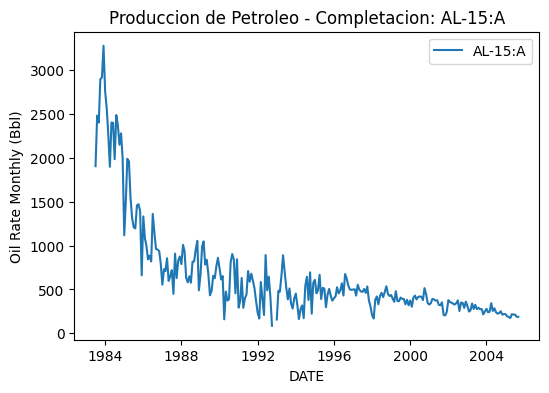

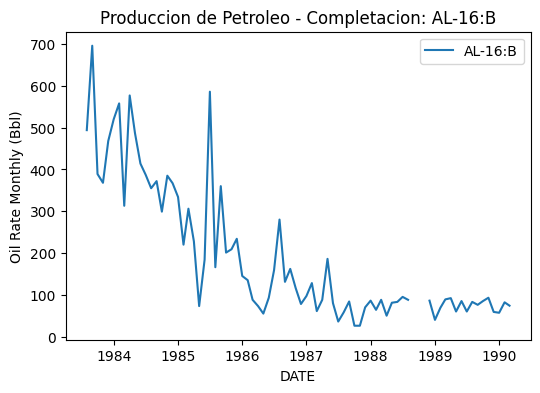

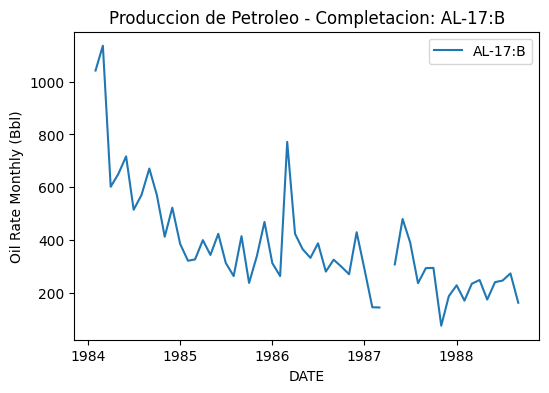

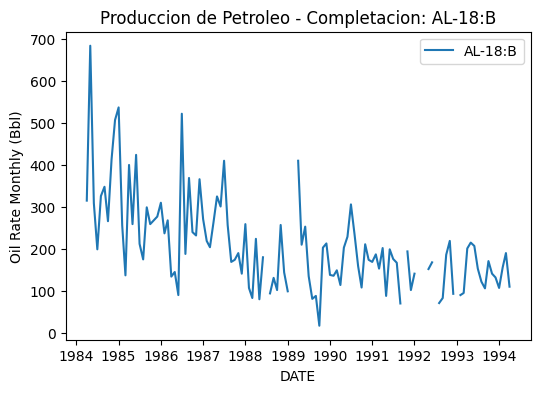

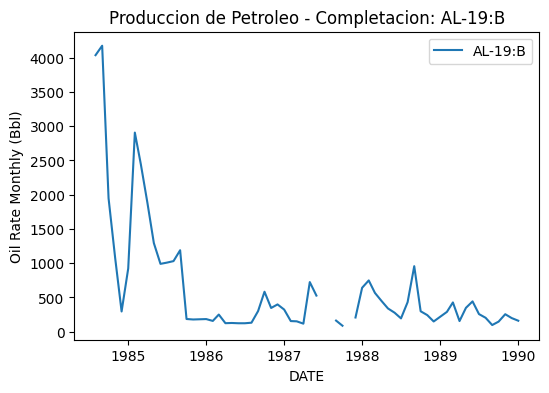

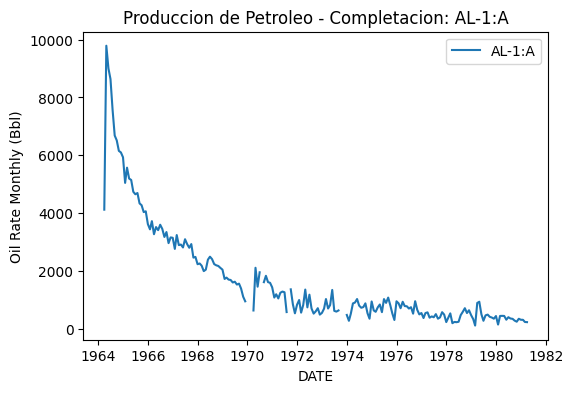

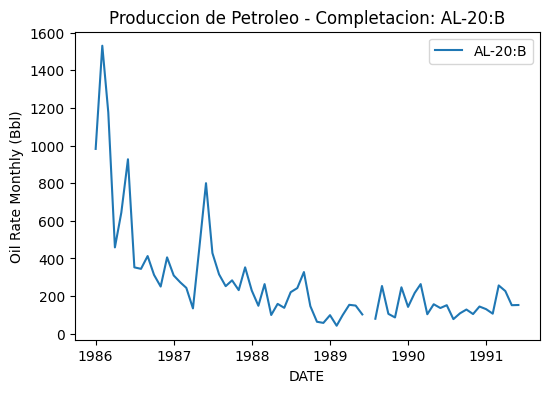

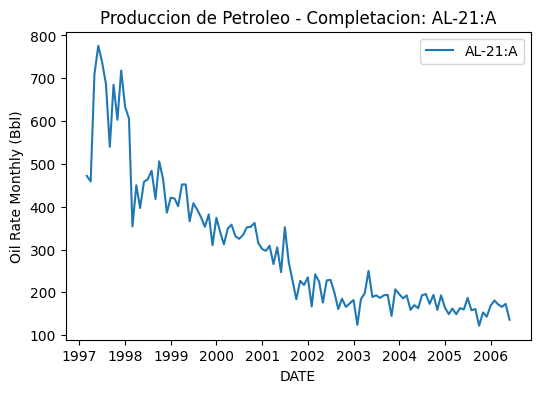

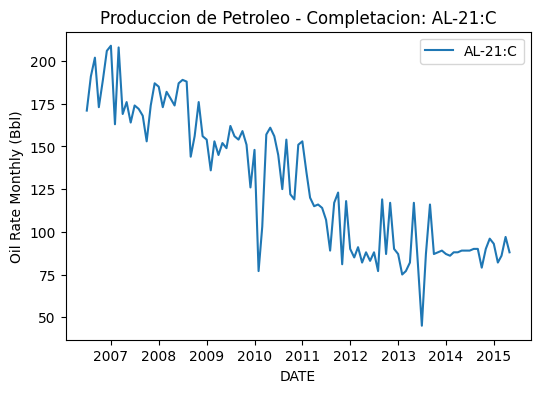

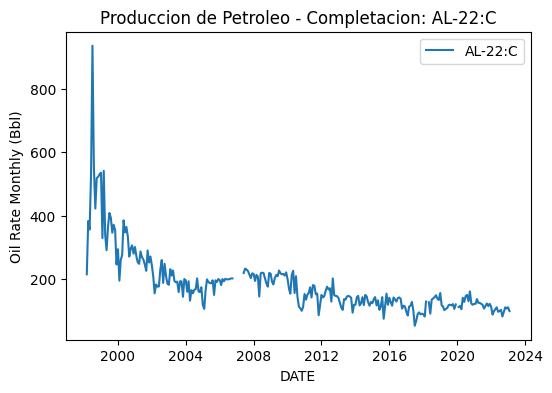

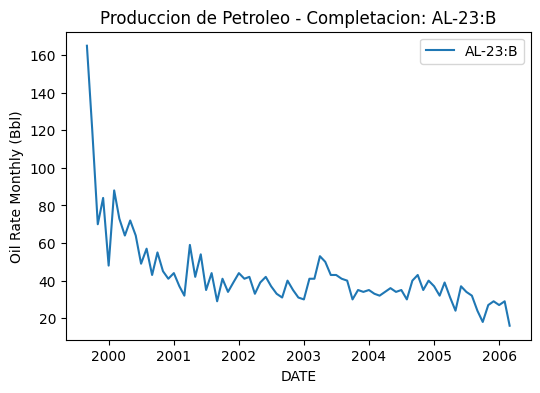

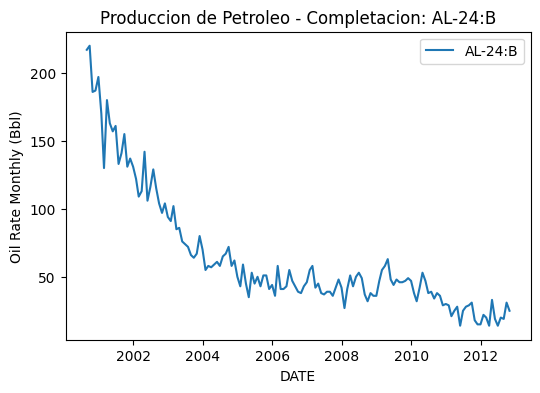

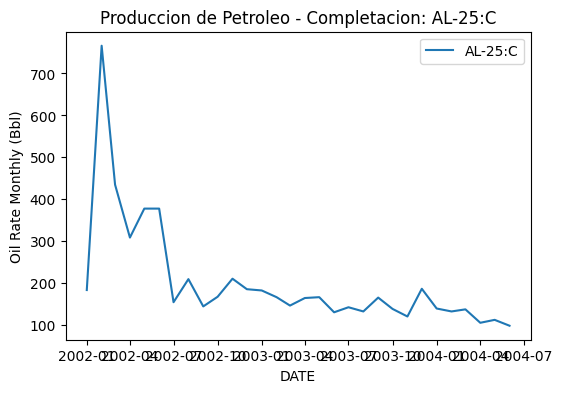

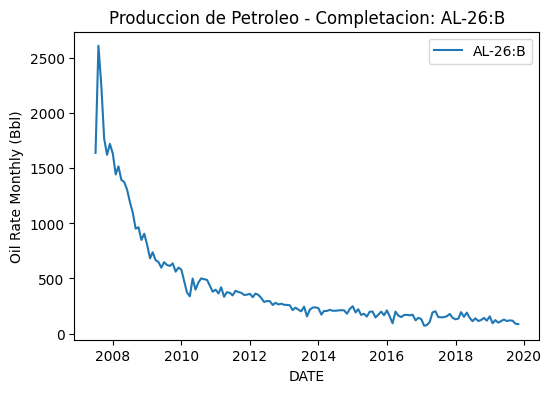

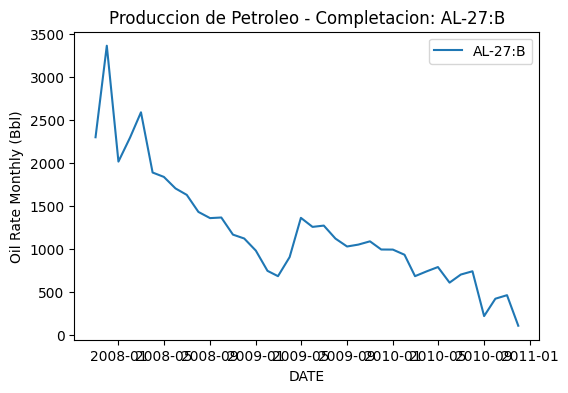

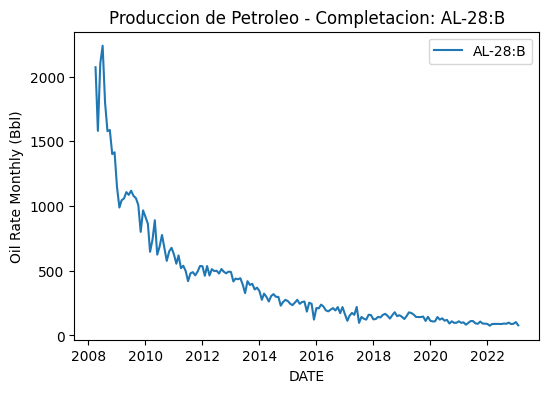

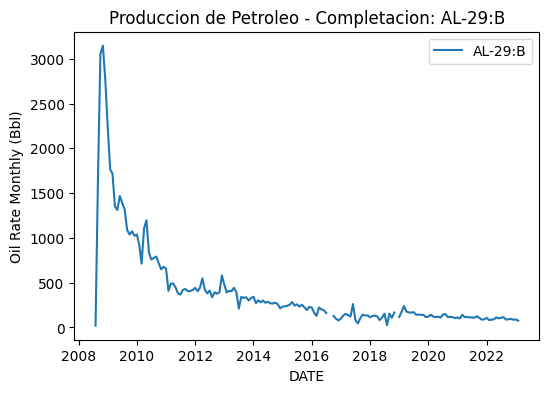

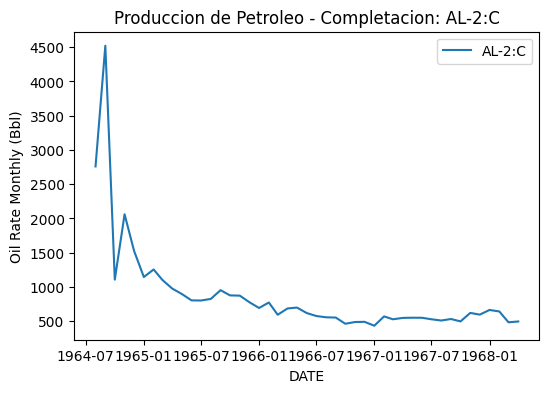

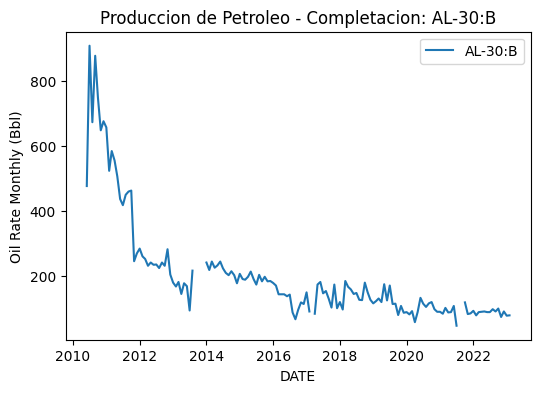

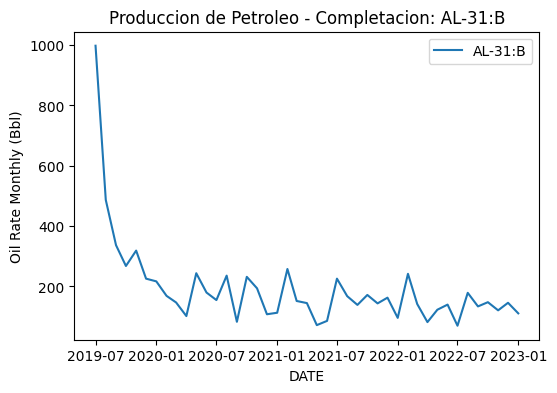

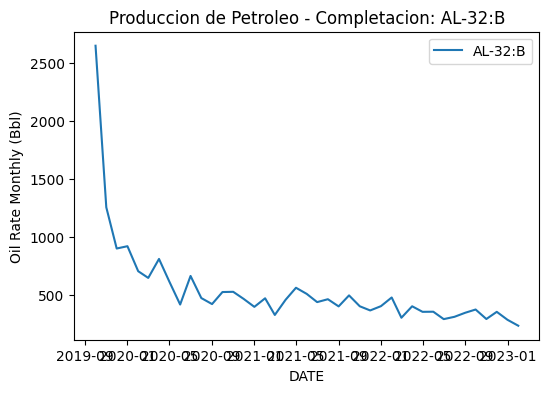

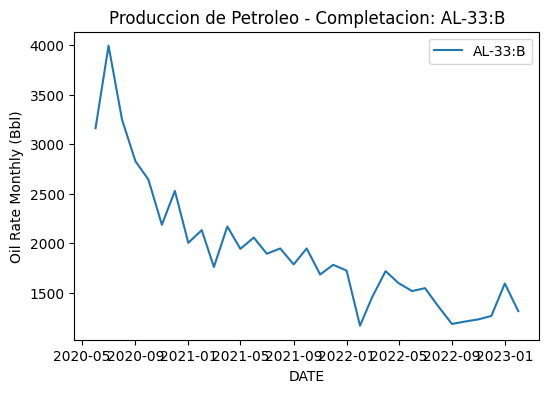

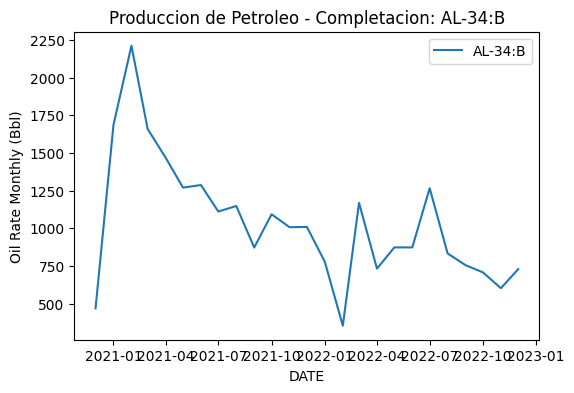

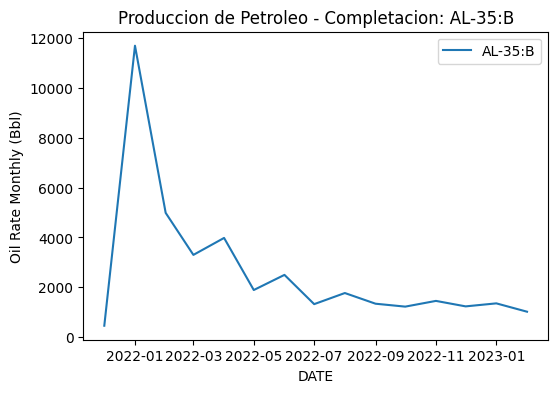

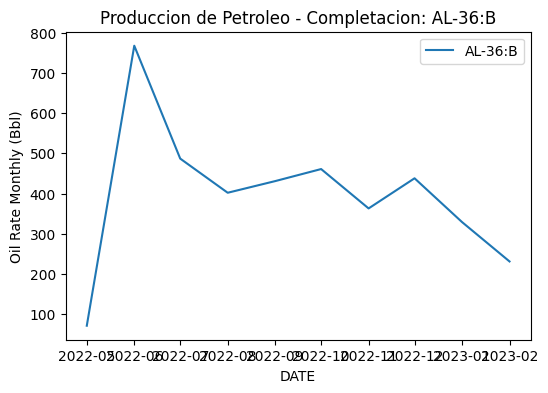

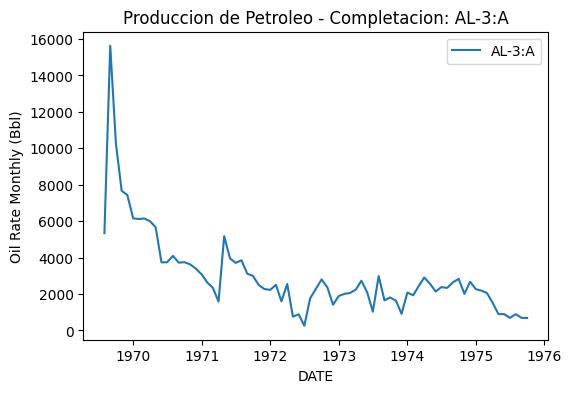

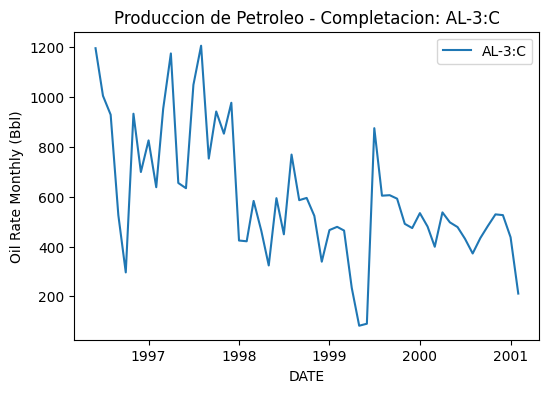

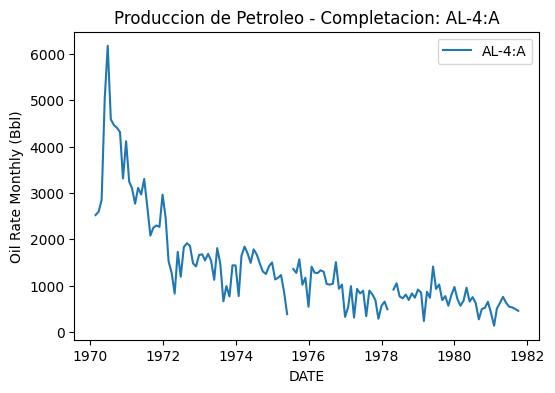

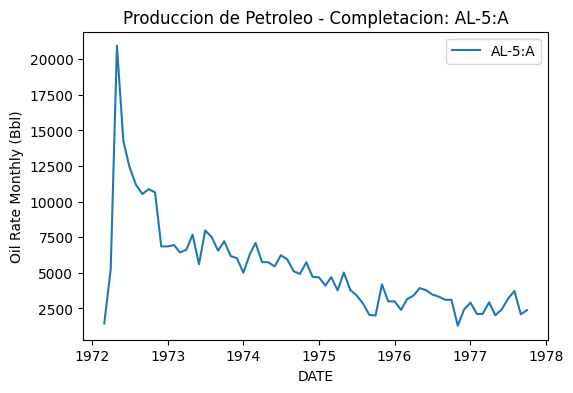

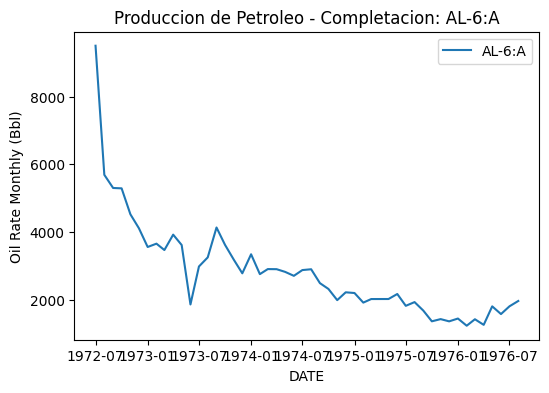

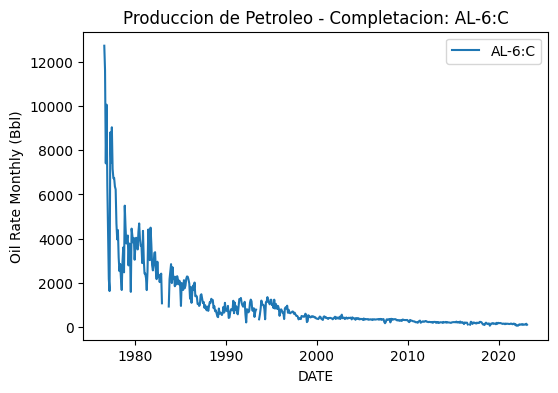

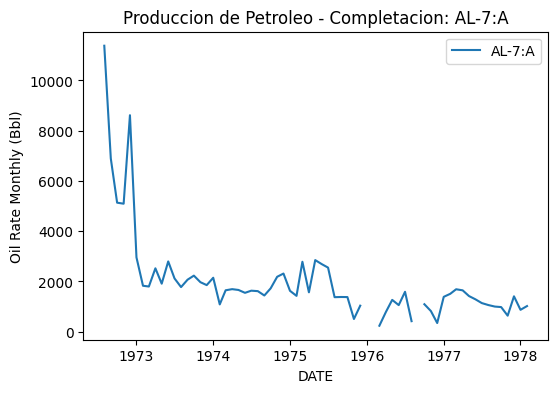

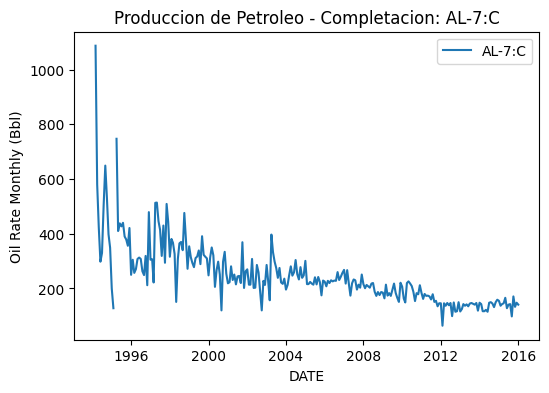

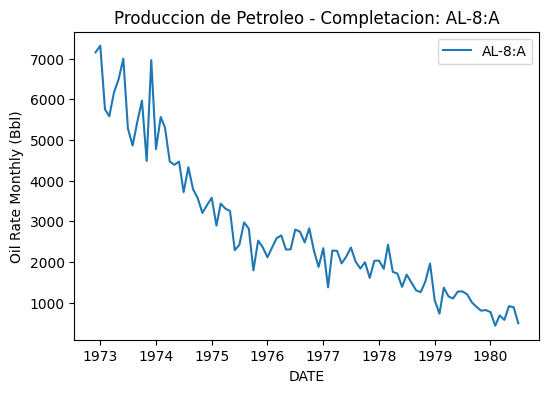

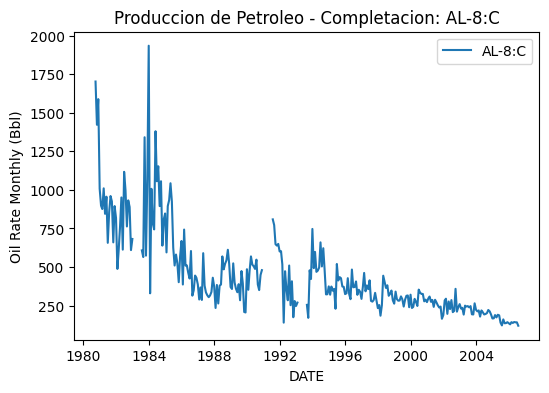

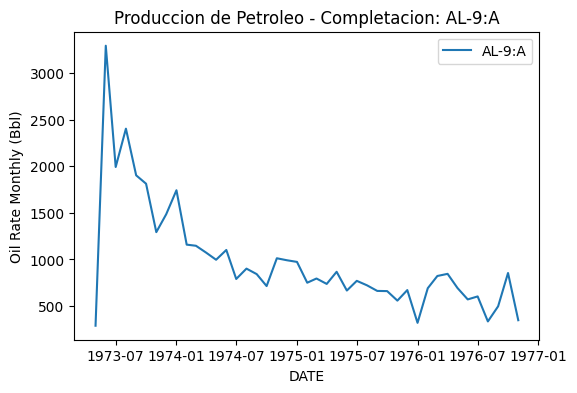

In [59]:
pozos = list(prdf.columns)
pozos = pozos[1:-1]
pozos

for i, pozo in enumerate(pozos):
    plt.figure(figsize=(6,4))
    plt.plot(prdf['DATE'], prdf[pozo], label=pozo)
    plt.xlabel('DATE')
    plt.ylabel('Oil Rate Monthly (Bbl)')
    plt.title("Produccion de Petroleo - Completacion: " +str(pozo))
    plt.legend()
    plt.show()

##**5. FUNÇÃO PARA AJUSTE DE CURVAS**

### *5.1 Crear funciones*

In [30]:
#volvemos a cargar la data
def read_in_csv(file_path):
    dataframe=pd.read_csv(file_path, parse_dates=['DATE'], dayfirst=True)
    return dataframe

#definimos la ecuacion de curvas de declinacion de Arps Hiperbolica a utilizar para los ajustes de historia productivos
def hyperbolic_equation(t, qi, b, di):
    return qi/((1.0+b*di*t)**(1.0/b))

#definimos la ecuacion de curvas de declinacion de Arps exponencial a utilizar para los ajustes de historia productivos
def exponential_equation(t, qi, di):
    return qi*np.exp(-di*t)

#definimos la ecuacion de curvas de declinacion de Duong (reservorios no convencionales) a utilizar para los ajustes de historia productivos
def duong_equation(t, qi, m, a):
    qd = (qi * np.power(t,-m))* np.exp((a / (1 - m)) * ((np.power(t,(1-m))) - 1))
    return qd

#vamos a realizar tratamiento do df e fazer limpieza do 0 e null/Nan
def remove_nan_and_zeroes_from_columns(df, variable):
    filtered_df = df[(df[variable].notnull()) & (df[variable]>0)]
    return filtered_df

#efective production time for each well
def generate_time_delta_column(df, time_column, date_first_online_column):
    return (df[time_column]-df[date_first_online_column]).dt.days

# get min date for each well to start curve fit    
def get_min_or_max_value_in_column_by_group(dataframe, group_by_column, calc_column, calc_type):
    value=dataframe.groupby(group_by_column)[calc_column].transform(calc_type)
    return value

#Define Initial Rate for curve fit
def get_max_initial_production(df, number_first_months, variable_column, date_column):
    #First, sort the data frame from earliest to most recent prod date
    df=df.sort_values(by=date_column)
    #Pull out the first x months of production, where number_first_months is x
    df_beginning_production=df.head(number_first_months)
    #Return the max value in the selected variable column from the newly created 
    #df_beginning_production df
    return df_beginning_production[variable_column].max()

#plot results for every well
def plot_actual_vs_predicted_by_equations(df, x_variable, y_variables, plot_title):
    df.plot(x=x_variable, y=y_variables, title=plot_title, )
    plt.xlabel('Production Time (Days)')
    plt.ylabel('Oil Rate (BOPD)')
    plt.show()

### *5.2 Graficos de ajuste por pozo*

Exponential Fit Curve-fitted Variables: qi=73.82134057311329, di=9.927178659426886
Hyperbolic Fit Curve-fitted Variables: qi=230.2670784848646, b=0.9872425079725496, di=0.0015596787081019149
Duong Fit Curve-fitted Variables: qi=686.4877316396557, b=1.0865227662797416, di=1.0333558853838223


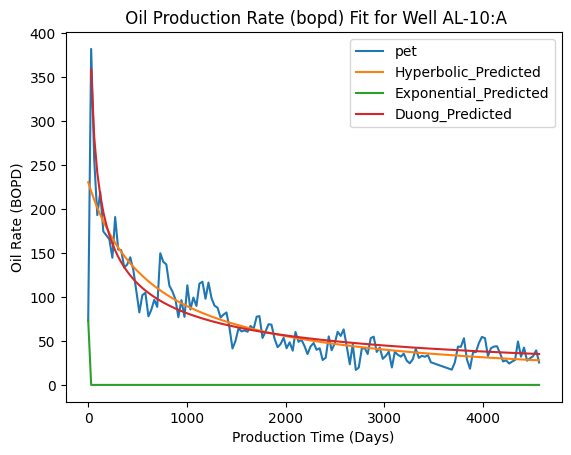

Exponential Fit Curve-fitted Variables: qi=19.602582659644384, di=9.981397417340355
Hyperbolic Fit Curve-fitted Variables: qi=17.228001348145213, b=2.120274646382224, di=0.0016389123411569995
Duong Fit Curve-fitted Variables: qi=25.90517044953603, b=1.03832656762396, di=1.0000000000000002


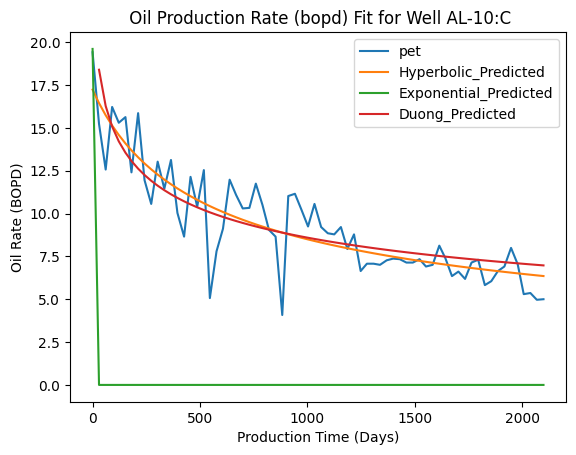

Exponential Fit Curve-fitted Variables: qi=8.239876949293574, di=9.992760123050706
Hyperbolic Fit Curve-fitted Variables: qi=37.47675691651627, b=3.0601456698327083, di=0.0010000000000014474
Duong Fit Curve-fitted Variables: qi=48.15347500696625, b=1.0472964570470846, di=1.1075257829565142


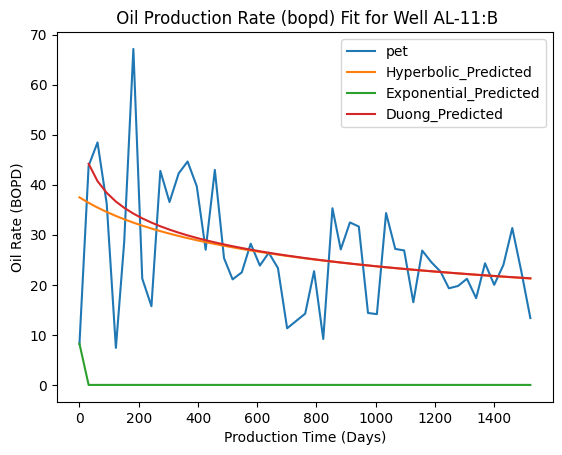

Exponential Fit Curve-fitted Variables: qi=73.854537633839, di=9.927145462366159
Hyperbolic Fit Curve-fitted Variables: qi=57.23729205934633, b=0.5710327085471695, di=0.0013788148121990167
Duong Fit Curve-fitted Variables: qi=237.648056561309, b=1.1039572808443507, di=1.0000000000000002


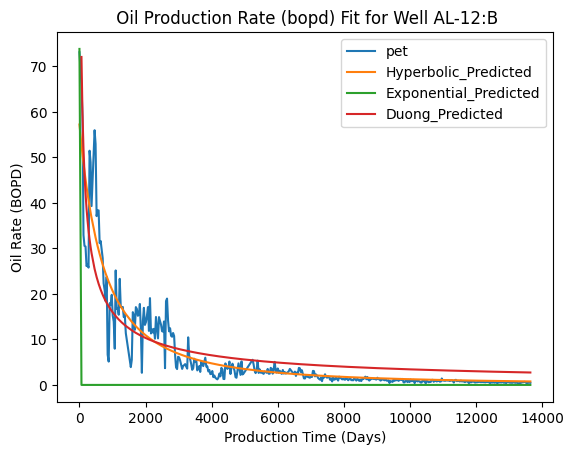

Exponential Fit Curve-fitted Variables: qi=2.7577163512863447, di=9.998242283648713
Hyperbolic Fit Curve-fitted Variables: qi=75.68991387676678, b=0.8974285875307735, di=0.003099462976124882
Duong Fit Curve-fitted Variables: qi=523.1277440919048, b=1.15343179664658, di=1.0057986890958128


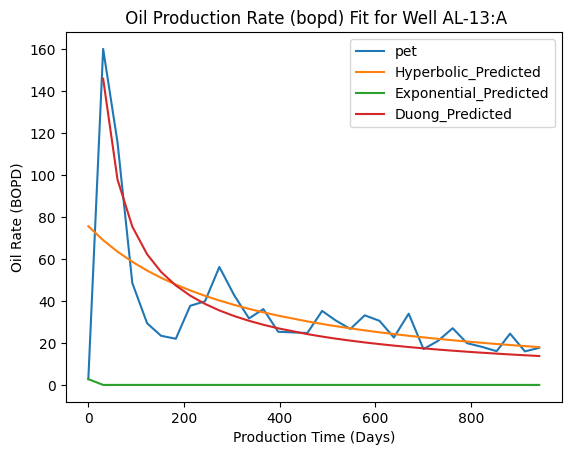

Exponential Fit Curve-fitted Variables: qi=38.672839967975044, di=9.962327160032027
Hyperbolic Fit Curve-fitted Variables: qi=33.87535929128463, b=3.337470131093323, di=0.0010000000000000009
Duong Fit Curve-fitted Variables: qi=50.204309679026885, b=1.029648769176131, di=1.0000000000000002


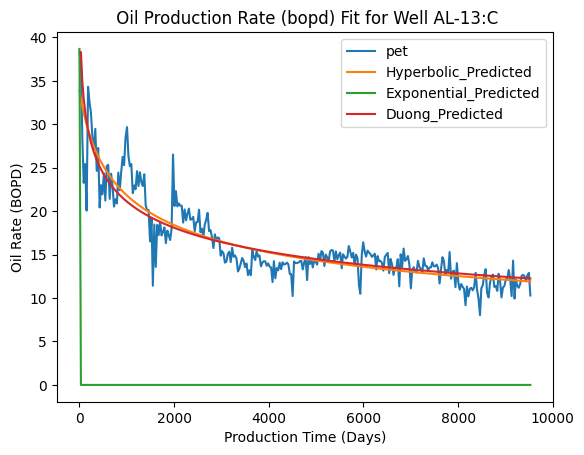

Exponential Fit Curve-fitted Variables: qi=345.59050148279874, di=9.655409498517201
Hyperbolic Fit Curve-fitted Variables: qi=321.8377335128828, b=1.6218013512018912, di=0.017969236067246867
Duong Fit Curve-fitted Variables: qi=423.2104707213623, b=1.0846115493224944, di=1.0000000000000002


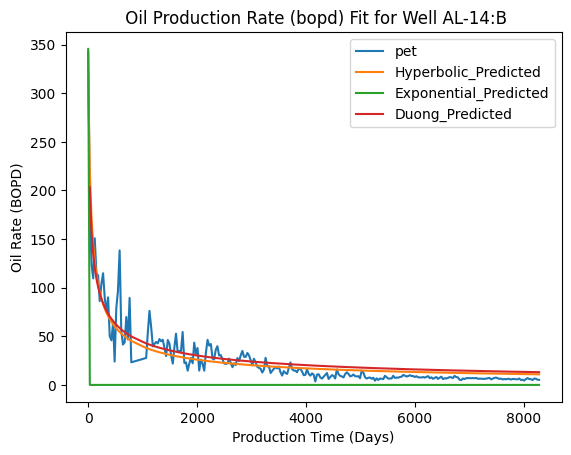

Exponential Fit Curve-fitted Variables: qi=63.223877289422994, di=9.937776122710575
Hyperbolic Fit Curve-fitted Variables: qi=99.35739580201789, b=1.0473164827601888, di=0.0015477568859002398
Duong Fit Curve-fitted Variables: qi=261.6826005984527, b=1.0745768887563887, di=1.0000000000000002


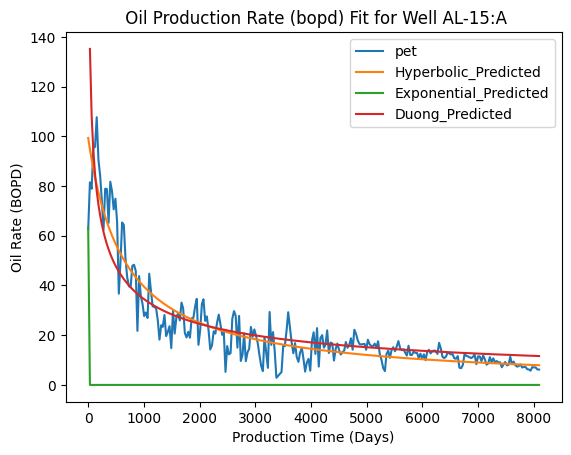

Exponential Fit Curve-fitted Variables: qi=16.413062237799085, di=9.984586937762199
Hyperbolic Fit Curve-fitted Variables: qi=18.8389491772335, b=0.09680748107717783, di=0.0013058761431832399
Duong Fit Curve-fitted Variables: qi=50.95115670588508, b=1.0813675046409368, di=1.0000000000000002


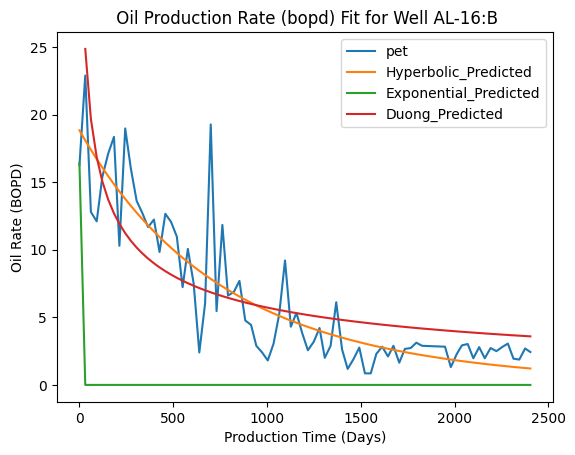

Exponential Fit Curve-fitted Variables: qi=34.619634571197714, di=9.966380365428805
Hyperbolic Fit Curve-fitted Variables: qi=36.20870214636591, b=2.3292530163324043, di=0.008834135002644614
Duong Fit Curve-fitted Variables: qi=52.680281332848054, b=1.0588643412115135, di=1.0000000000000002


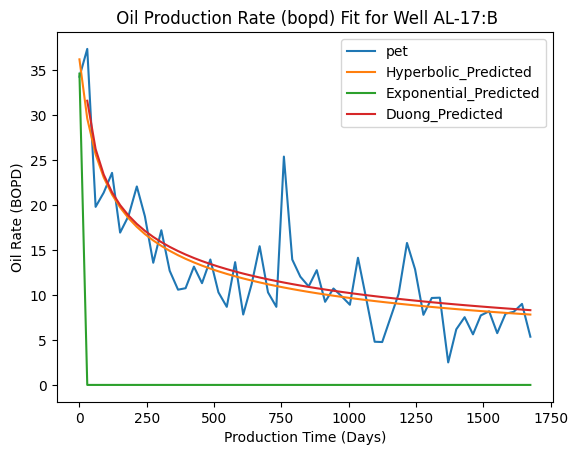

Exponential Fit Curve-fitted Variables: qi=10.465883130708722, di=9.990534116869293
Hyperbolic Fit Curve-fitted Variables: qi=13.556099206444285, b=1.800718833276749, di=0.0010148047659842073
Duong Fit Curve-fitted Variables: qi=25.396333472186434, b=1.0445735639864309, di=1.0029937518710674


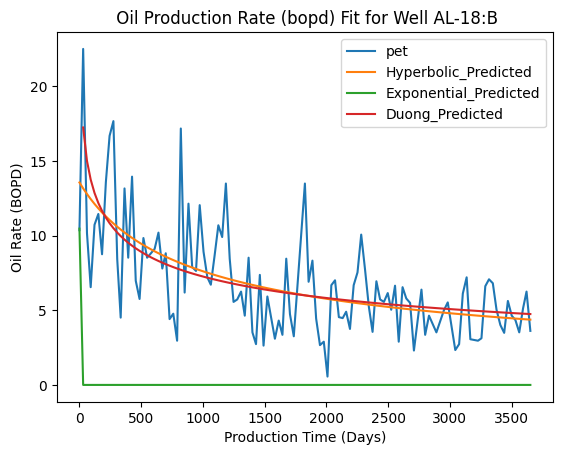

Exponential Fit Curve-fitted Variables: qi=134.11282182441371, di=9.866887178175586
Hyperbolic Fit Curve-fitted Variables: qi=140.5024652474361, b=1.076028254350243, di=0.013129666418091232
Duong Fit Curve-fitted Variables: qi=253.78060229976754, b=1.1067770122174925, di=1.000000000000009


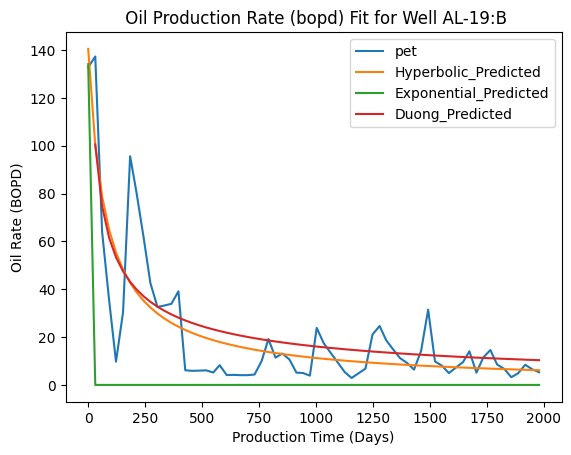

Exponential Fit Curve-fitted Variables: qi=136.83656390196398, di=9.864163436098039
Hyperbolic Fit Curve-fitted Variables: qi=265.72812066464877, b=0.5185931944971259, di=0.0012849418134867918
Duong Fit Curve-fitted Variables: qi=936.3750126123745, b=1.092516978443646, di=1.0000000000000433


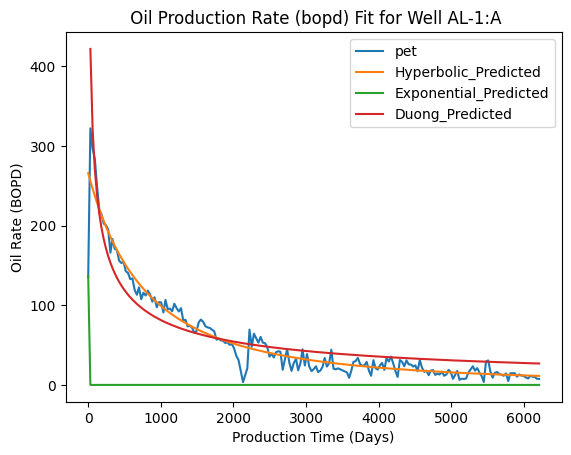

Exponential Fit Curve-fitted Variables: qi=32.62624656172354, di=9.968373753438277
Hyperbolic Fit Curve-fitted Variables: qi=41.931847913871785, b=1.1672237554304359, di=0.007396449168012415
Duong Fit Curve-fitted Variables: qi=109.5497481038322, b=1.1073847292791805, di=1.0000000000000002


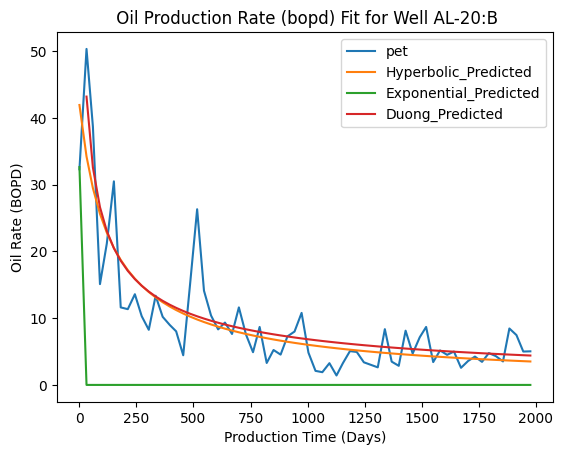

Exponential Fit Curve-fitted Variables: qi=15.682127609239737, di=9.98531787239076
Hyperbolic Fit Curve-fitted Variables: qi=23.533689286672914, b=0.8456438602268009, di=0.0010000000000000002
Duong Fit Curve-fitted Variables: qi=48.217772461973794, b=1.0561199701084192, di=1.0082520383374105


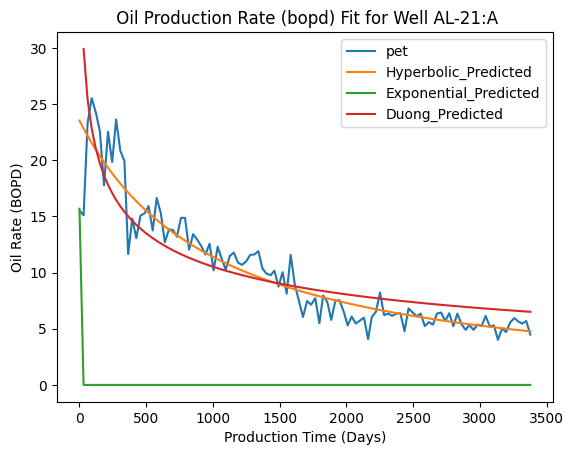

Exponential Fit Curve-fitted Variables: qi=5.681506682142103, di=9.995318493317859
Hyperbolic Fit Curve-fitted Variables: qi=7.637251300016833, b=2.2384738803582898, di=0.0010000000000001674
Duong Fit Curve-fitted Variables: qi=11.142620636697465, b=1.0343885271652036, di=1.0111159408456878


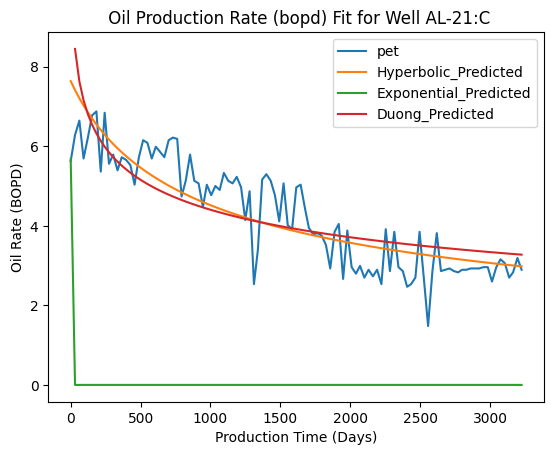

Exponential Fit Curve-fitted Variables: qi=7.14340303253513, di=9.993856596967463
Hyperbolic Fit Curve-fitted Variables: qi=17.197323249416684, b=1.907138526325123, di=0.001093817150296713
Duong Fit Curve-fitted Variables: qi=3.7191040739582273, b=1.1370755637729852, di=1.9745002305520847


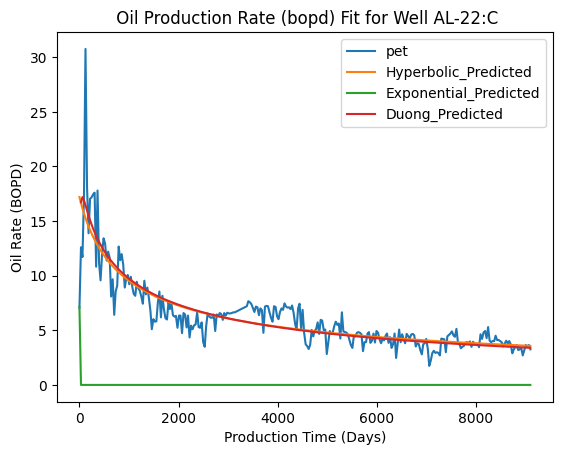

Exponential Fit Curve-fitted Variables: qi=5.482155611258405, di=9.995517844388742
Hyperbolic Fit Curve-fitted Variables: qi=5.460219562116476, b=3.282535382773985, di=0.035187751386891286
Duong Fit Curve-fitted Variables: qi=5.254338545295539, b=1.0480802445933661, di=1.0000000000000002


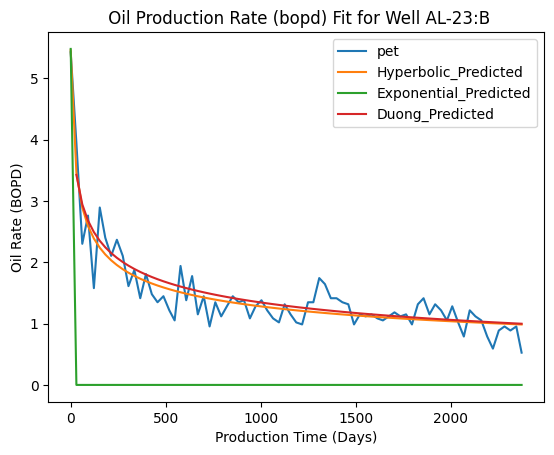

Exponential Fit Curve-fitted Variables: qi=7.209852811840835, di=9.99379014718816
Hyperbolic Fit Curve-fitted Variables: qi=7.244350877069183, b=0.9573952220639175, di=0.0015902447211495025
Duong Fit Curve-fitted Variables: qi=16.926601884683343, b=1.0693717191987342, di=1.0000000000000002


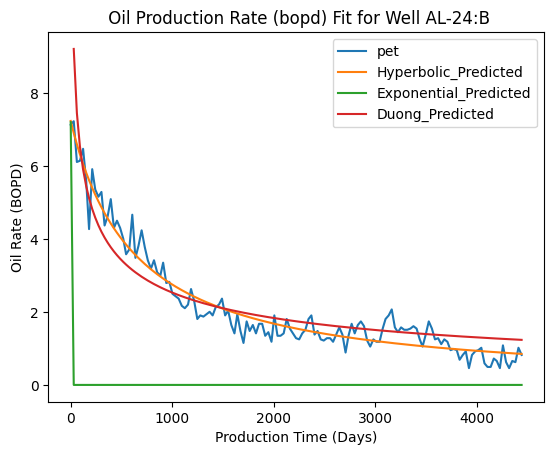

Exponential Fit Curve-fitted Variables: qi=6.113430567754773, di=9.994886569432245
Hyperbolic Fit Curve-fitted Variables: qi=15.010337326323919, b=0.8495560028073554, di=0.003518437486811327
Duong Fit Curve-fitted Variables: qi=59.5579336459313, b=1.1159629653886254, di=1.0000000000000002


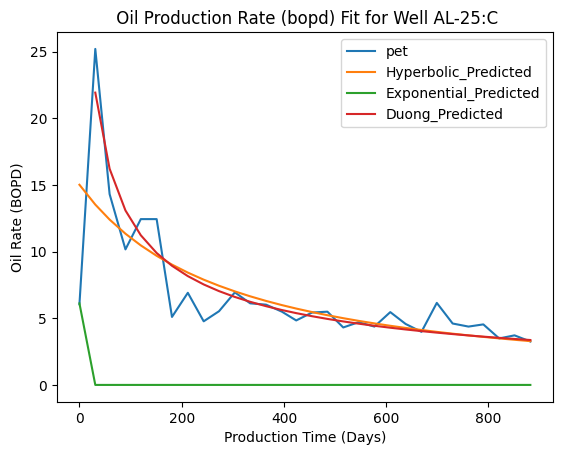

Exponential Fit Curve-fitted Variables: qi=54.48663411900315, di=9.946513365880996
Hyperbolic Fit Curve-fitted Variables: qi=75.56097889546959, b=0.6927040708990645, di=0.0025479020637569527
Duong Fit Curve-fitted Variables: qi=243.78352192892328, b=1.102416061295388, di=1.0000000000000002


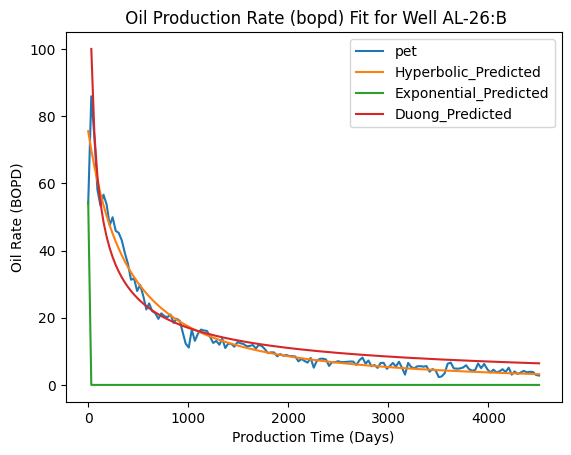

Exponential Fit Curve-fitted Variables: qi=76.27962536464746, di=9.924720374635351
Hyperbolic Fit Curve-fitted Variables: qi=91.76138283803635, b=0.6923950703713417, di=0.002639100225482336
Duong Fit Curve-fitted Variables: qi=205.36218568047036, b=1.075780297494957, di=1.0000000000000002


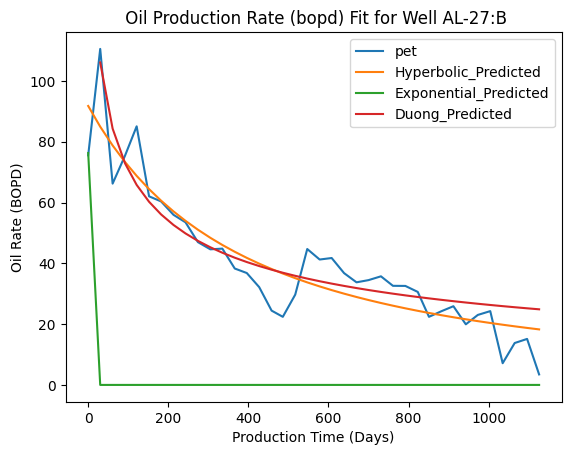

Exponential Fit Curve-fitted Variables: qi=68.8382229459913, di=9.93216177705401
Hyperbolic Fit Curve-fitted Variables: qi=68.55787872061869, b=0.701140692871511, di=0.0019088498418750324
Duong Fit Curve-fitted Variables: qi=185.52071507820995, b=1.0865280384536726, di=1.0000000000000002


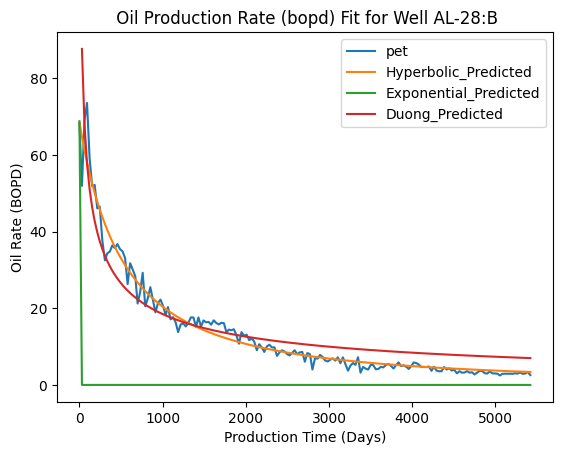

Exponential Fit Curve-fitted Variables: qi=1.0000000016310033, di=9.99999999999837
Hyperbolic Fit Curve-fitted Variables: qi=72.49114780744912, b=0.44683324842121863, di=0.0016840086632400803
Duong Fit Curve-fitted Variables: qi=8.383656266871135, b=1.2629570514659247, di=2.9999999999999996


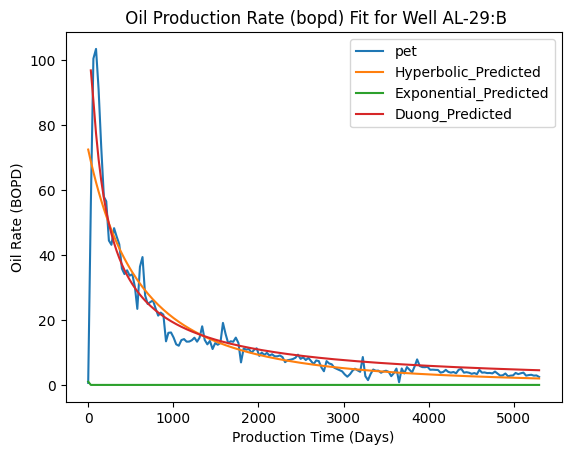

Exponential Fit Curve-fitted Variables: qi=91.66038810974048, di=9.909339611890259
Hyperbolic Fit Curve-fitted Variables: qi=110.74662144537808, b=1.4238216290793224, di=0.010410963915573893
Duong Fit Curve-fitted Variables: qi=236.54938118094026, b=1.097750560042738, di=1.0000000000000002


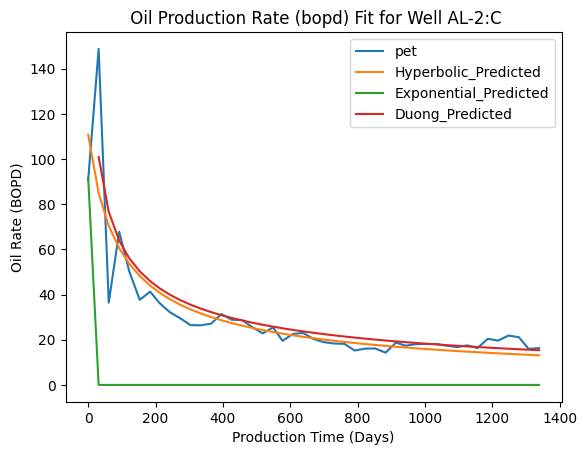

Exponential Fit Curve-fitted Variables: qi=15.84824920951507, di=9.985151750790486
Hyperbolic Fit Curve-fitted Variables: qi=27.208092526916328, b=1.1277299035287711, di=0.0024895147206852306
Duong Fit Curve-fitted Variables: qi=73.99861577098554, b=1.0834079287279068, di=1.0000000000000002


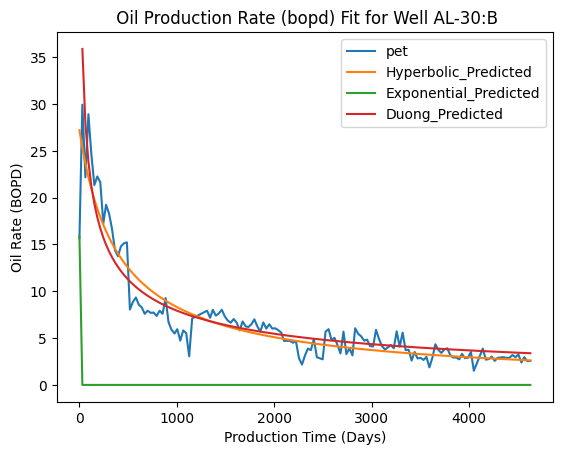

Exponential Fit Curve-fitted Variables: qi=33.1578174746065, di=9.967842182525393
Hyperbolic Fit Curve-fitted Variables: qi=32.88219354257961, b=2.7876444010014256, di=0.10939202571482626
Duong Fit Curve-fitted Variables: qi=20.267277704381115, b=1.0490495743858816, di=1.0000000000000002


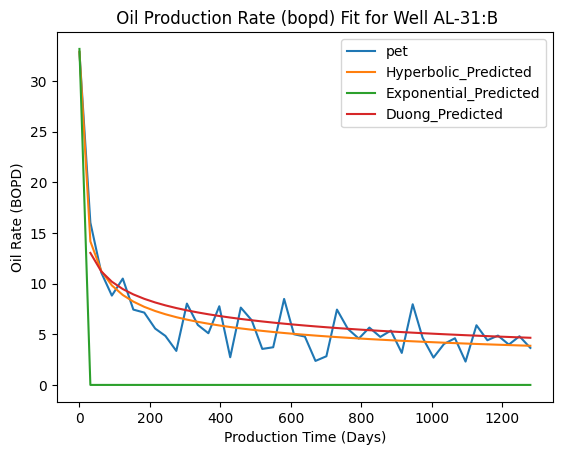

Exponential Fit Curve-fitted Variables: qi=88.03947303259287, di=9.91296052696741
Hyperbolic Fit Curve-fitted Variables: qi=87.1994525557867, b=2.6679069311523302, di=0.0841371301500504
Duong Fit Curve-fitted Variables: qi=57.92696337186472, b=1.0508266416996923, di=1.0000000000000002


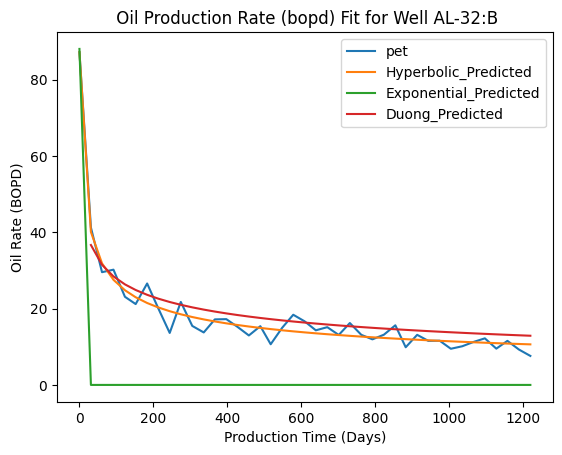

Exponential Fit Curve-fitted Variables: qi=105.0475770473591, di=9.89595242295264
Hyperbolic Fit Curve-fitted Variables: qi=119.15190953893084, b=1.9283912479240235, di=0.0033837713243885146
Duong Fit Curve-fitted Variables: qi=200.16953831496573, b=1.0530830114879823, di=1.0000000000000002


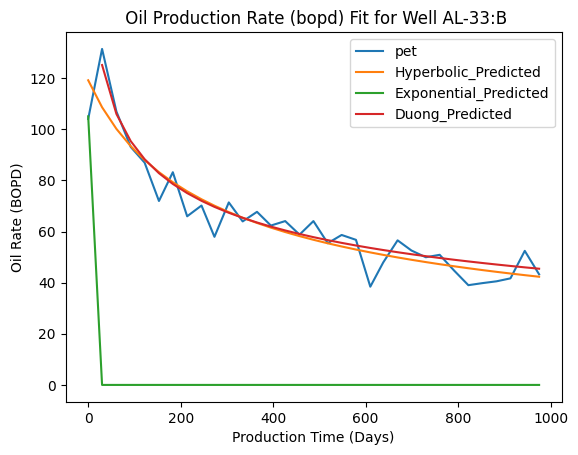

Exponential Fit Curve-fitted Variables: qi=15.549230289308651, di=9.985450769710692
Hyperbolic Fit Curve-fitted Variables: qi=49.08914394584441, b=7.757759146535782e-09, di=0.0010689276663333348
Duong Fit Curve-fitted Variables: qi=105.65598279804547, b=1.069231156339623, di=1.0543857845814786


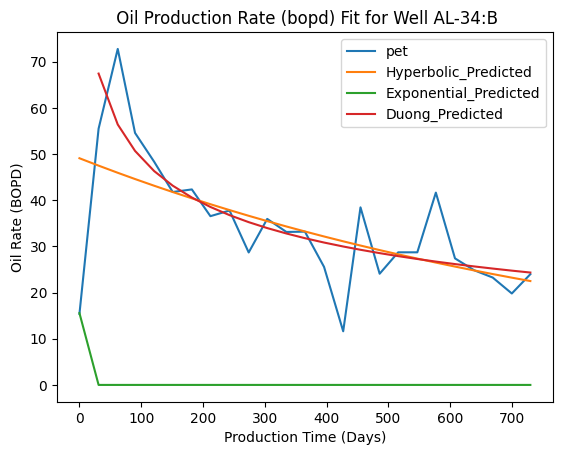

Exponential Fit Curve-fitted Variables: qi=15.150674205644073, di=9.985849325794357
Hyperbolic Fit Curve-fitted Variables: qi=185.60963157190022, b=1.328093342393207e-10, di=0.0042440088527109406
Duong Fit Curve-fitted Variables: qi=3377.232399848017, b=1.282579040334173, di=1.0000000000002591


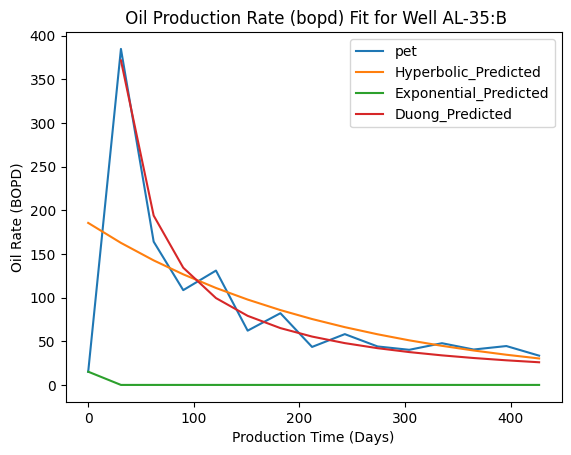

Exponential Fit Curve-fitted Variables: qi=2.358995566790602, di=9.998641004433209
Hyperbolic Fit Curve-fitted Variables: qi=14.96094251877988, b=4.0705777332934686e-07, di=0.0010000000001398892
Duong Fit Curve-fitted Variables: qi=43.35415290580925, b=1.0944608558468063, di=1.0720690069349186


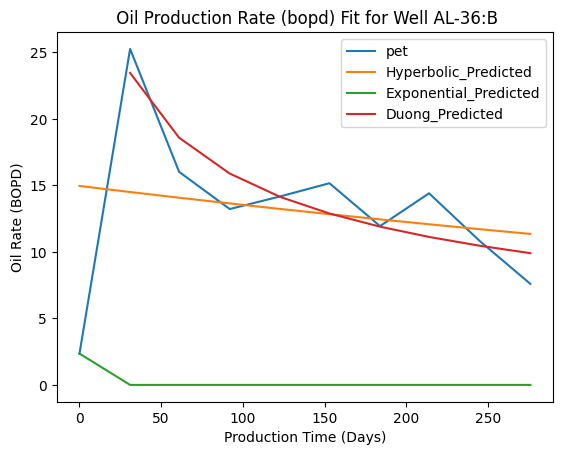

Exponential Fit Curve-fitted Variables: qi=177.49163534781852, di=9.82350836465218
Hyperbolic Fit Curve-fitted Variables: qi=347.072842347792, b=1.178696488087146, di=0.0040013288956949455
Duong Fit Curve-fitted Variables: qi=1128.7176994664599, b=1.1022510273388424, di=1.0000000000000002


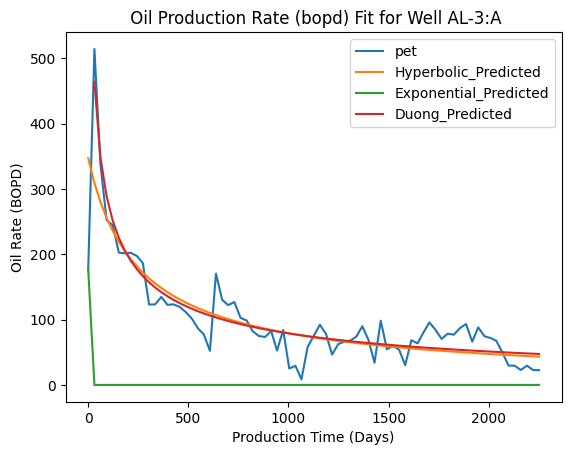

Exponential Fit Curve-fitted Variables: qi=39.73596581563069, di=9.96126403418437
Hyperbolic Fit Curve-fitted Variables: qi=32.247305694630924, b=1.3513725835163577, di=0.0010000000000000078
Duong Fit Curve-fitted Variables: qi=47.10630369444446, b=1.0337461471223215, di=1.0000000000000038


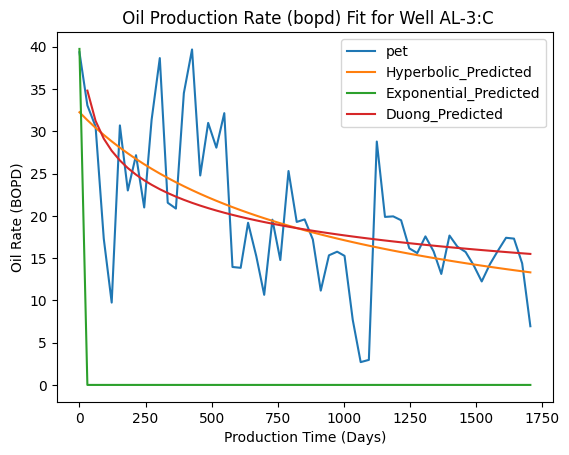

Exponential Fit Curve-fitted Variables: qi=83.78736002511825, di=9.917212639974881
Hyperbolic Fit Curve-fitted Variables: qi=145.5165919804114, b=0.7157070645820003, di=0.0012153330832672539
Duong Fit Curve-fitted Variables: qi=349.245344412665, b=1.069820501338261, di=1.008947389766282


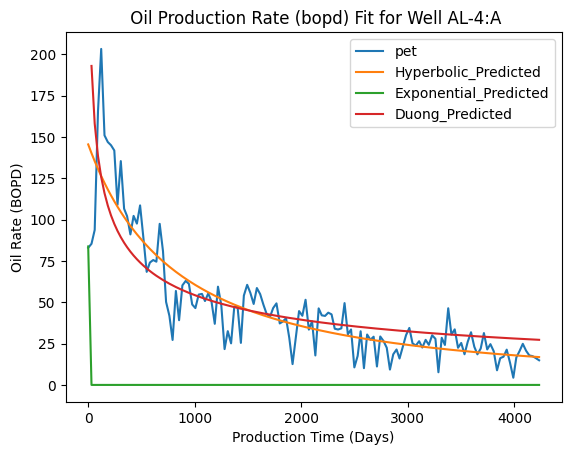

Exponential Fit Curve-fitted Variables: qi=48.0415738031435, di=9.952958426196856
Hyperbolic Fit Curve-fitted Variables: qi=372.35227211115233, b=0.2574825641712116, di=0.0010000000000000002
Duong Fit Curve-fitted Variables: qi=24.219204702896835, b=1.232004920889621, di=2.9999999999999996


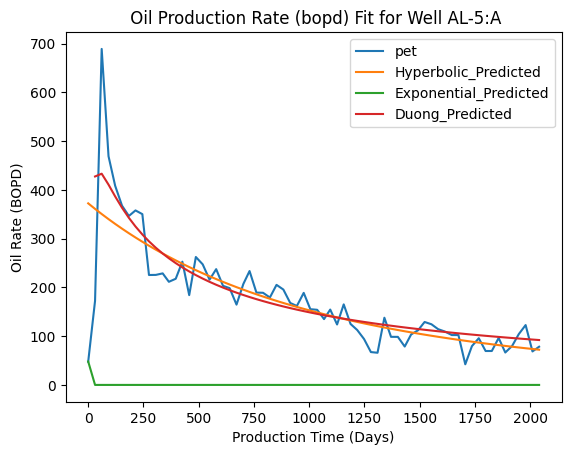

Exponential Fit Curve-fitted Variables: qi=315.5414107624221, di=9.685458589237577
Hyperbolic Fit Curve-fitted Variables: qi=304.8993461256228, b=2.610838987687962, di=0.017736655815774095
Duong Fit Curve-fitted Variables: qi=333.51843669732125, b=1.0525176347595706, di=1.0000000000000002


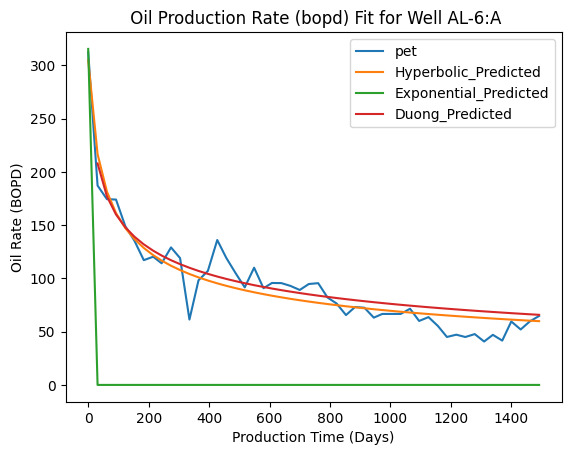

Exponential Fit Curve-fitted Variables: qi=423.1785169563179, di=9.577821483043682
Hyperbolic Fit Curve-fitted Variables: qi=287.7941122767646, b=0.809679956720854, di=0.0012241668191988549
Duong Fit Curve-fitted Variables: qi=909.8512233523602, b=1.0848565135020949, di=1.0000000000000053


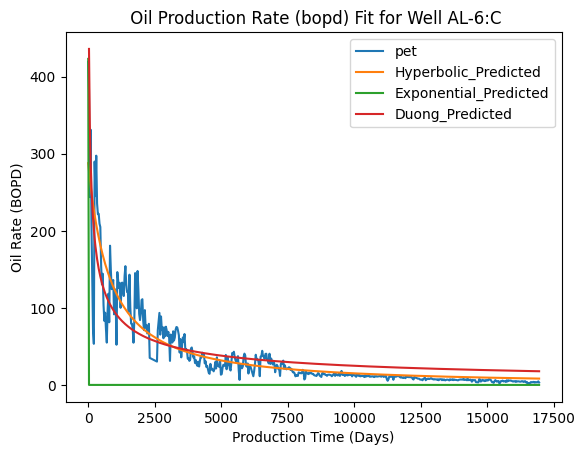

Exponential Fit Curve-fitted Variables: qi=377.99500300767, di=9.62300499699233
Hyperbolic Fit Curve-fitted Variables: qi=374.9372334923293, b=1.8575011498370493, di=0.024623318822086862
Duong Fit Curve-fitted Variables: qi=400.58727858693055, b=1.0714901929165181, di=1.0000000000000002


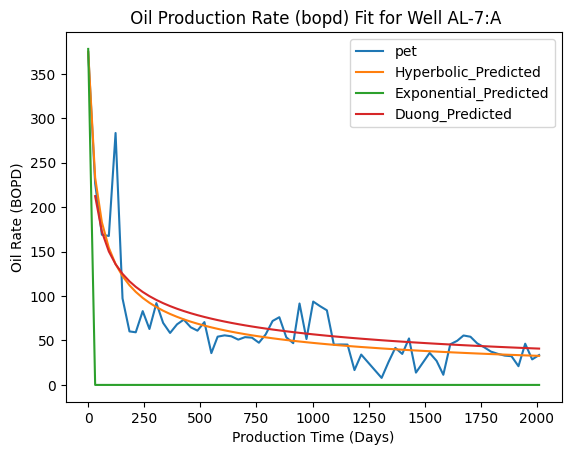

Exponential Fit Curve-fitted Variables: qi=36.11467036314858, di=9.964885329636852
Hyperbolic Fit Curve-fitted Variables: qi=34.957830819258376, b=4.178689640930605, di=0.041694317584453834
Duong Fit Curve-fitted Variables: qi=30.251681834913235, b=1.0359351983347922, di=1.0000000000000002


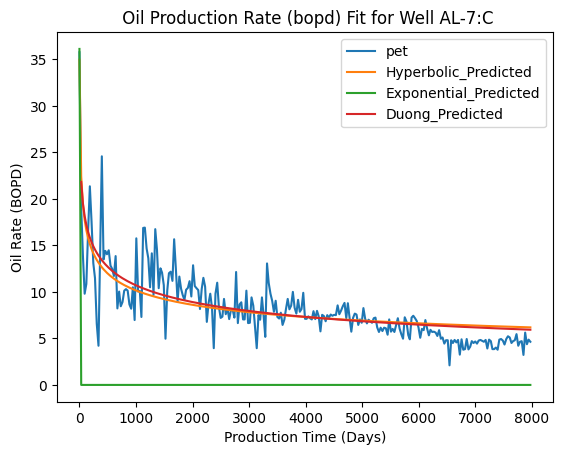

Exponential Fit Curve-fitted Variables: qi=237.53817311914017, di=9.763461826880858
Hyperbolic Fit Curve-fitted Variables: qi=232.69546328039084, b=0.29568535136711305, di=0.0010000000000000002
Duong Fit Curve-fitted Variables: qi=546.7672564686873, b=1.0655708397983226, di=1.0000000000000002


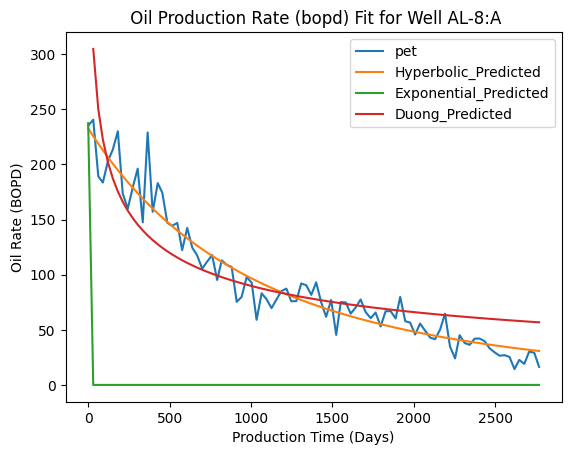

Exponential Fit Curve-fitted Variables: qi=56.546378196381326, di=9.944453621803618
Hyperbolic Fit Curve-fitted Variables: qi=43.43605826489659, b=1.7377344016670986, di=0.0010000000000000054
Duong Fit Curve-fitted Variables: qi=6.639411689124671, b=1.1378847893385535, di=2.0518507991262127


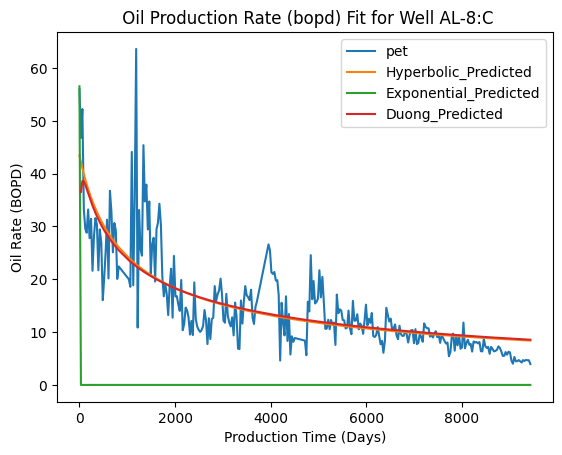

Exponential Fit Curve-fitted Variables: qi=9.63527034002294, di=9.991364729659978
Hyperbolic Fit Curve-fitted Variables: qi=66.95159705782142, b=0.5437032662674361, di=0.001727203105177883
Duong Fit Curve-fitted Variables: qi=206.7601397339443, b=1.1011969127115515, di=1.0680636856710848


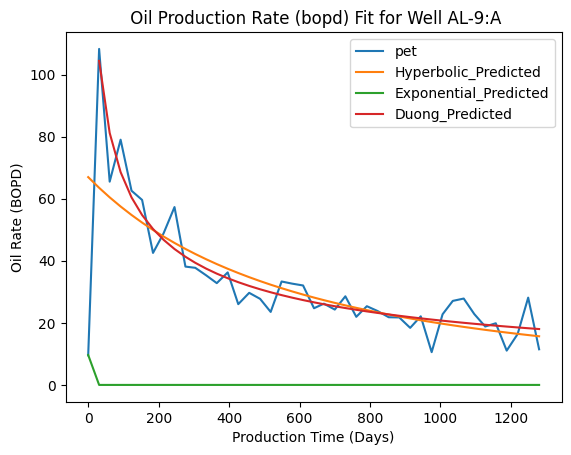

Exponential Fit Curve-fitted Variables: qi=10.399433979555571, di=9.990600566020444
Hyperbolic Fit Curve-fitted Variables: qi=10.484895899742105, b=5.590036180491071, di=0.019711511145778866
Duong Fit Curve-fitted Variables: qi=10.337410570902245, b=1.027459834183653, di=1.0000000000000002


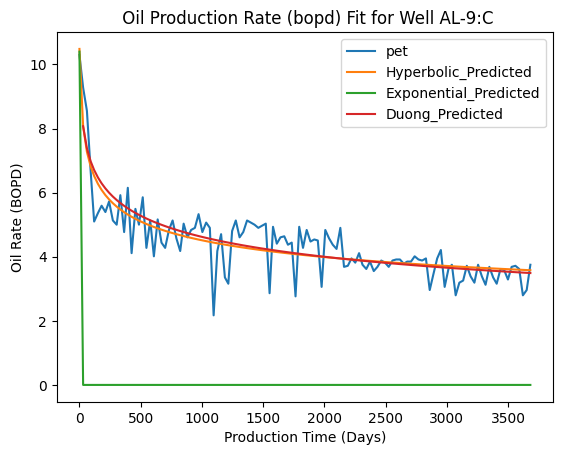

In [60]:
def main():
    #Read in the monthly oil and gas data
    file_path='https://raw.githubusercontent.com/nestorpalacios/MVP1/main/prdWell.csv'
    prod_data=read_in_csv(file_path)
    #Transform oil barrel monthly to oil barrel per day
    prod_data['pet']= prod_data['pet'] /30.4
    #Perform some data cleaning to get the columns as the right data type
    prod_data['DATE']=pd.to_datetime(prod_data['DATE'])
    #Declare the desired product that we want to curve fit for--it can either by 'Gas' or 'Oil'
    desired_product_type='pet'
    #Remove all rows with null values in the desired time series column
    prod_data=remove_nan_and_zeroes_from_columns(prod_data, desired_product_type)
    #Get the earliest RecordDate for each well
    prod_data['FirstDate']= get_min_or_max_value_in_column_by_group(prod_data, group_by_column='Completion', 
                  calc_column='DATE', calc_type='min')
    #Generate column for time online delta
    prod_data['ProdTotalDaysCum']=generate_time_delta_column(prod_data, time_column='DATE', 
                  date_first_online_column='FirstDate')
    #Pull data time
    prod_data_range=prod_data[(prod_data.FirstDate>='1964-04-01') & (prod_data.FirstDate<='2023-02-01')]
    #Get a list of unique well's to loop through
    unique_well_list=[ 'AL-10:A', 	 'AL-10:C', 	 'AL-11:B', 	 'AL-12:B', 	 'AL-13:A', 	 'AL-13:C', 	 'AL-14:B',
                           'AL-15:A', 	 'AL-16:B', 	 'AL-17:B', 	 'AL-18:B', 	 'AL-19:B', 	 'AL-1:A', 	 'AL-20:B', 	
                           'AL-21:A', 	 'AL-21:C', 	 'AL-22:C', 	 'AL-23:B', 	 'AL-24:B', 	 'AL-25:C', 	 'AL-26:B',
                           'AL-27:B', 	 'AL-28:B', 	 'AL-29:B', 	 'AL-2:C', 	 'AL-30:B', 	 'AL-31:B', 	 'AL-32:B', 
                           'AL-33:B', 	 'AL-34:B', 	 'AL-35:B', 	 'AL-36:B', 	 'AL-3:A', 	 'AL-3:C', 	 'AL-4:A', 	
                           'AL-5:A', 	 'AL-6:A', 	 'AL-6:C', 	 'AL-7:A', 	 'AL-7:C', 	 'AL-8:A', 	 'AL-8:C', 	 'AL-9:A',
                           'AL-9:C']
    #Loop through each well, and perform calculations
    for w in unique_well_list:
        #Subset the dataframe by w
        production_time_series=prod_data_range[prod_data_range.Completion==w]
        #Get the highest value of production in the first three months of production, to use as qi value
        qi=get_max_initial_production(production_time_series, 5, desired_product_type, 'DATE')
        lower_e=[1,0.001]
        upper_e=[10000,10]
        lower_h=[1,0,0.001]
        upper_h=[10000,15,10]
        lower_d=[1,1,1]
        upper_d=[10000,3,3]
        #Exponential curve fit the data to get best fit equation
        popt_exp, pcov_exp=curve_fit(exponential_equation, production_time_series['ProdTotalDaysCum']+0.001, 
                                     production_time_series[desired_product_type],bounds=(lower_e, upper_e))
        print('Exponential Fit Curve-fitted Variables: qi='+str(popt_exp[0])+', di='+str(popt_exp[1]))
        #Hyperbolic curve fit the data to get best fit equation
        popt_hyp, pcov_hyp=curve_fit(hyperbolic_equation, production_time_series['ProdTotalDaysCum'], 
                                     production_time_series[desired_product_type],bounds=(lower_h, upper_h))
        print('Hyperbolic Fit Curve-fitted Variables: qi='+str(popt_hyp[0])+', b='+str(popt_hyp[1])+', di='+str(popt_hyp[2]))
        #Duong curve fit the data to get best fit equation
        popt_dng, pcov_dng=curve_fit(duong_equation, production_time_series['ProdTotalDaysCum']+0.001, 
                                     production_time_series[desired_product_type],bounds=(lower_d, upper_d))
        print('Duong Fit Curve-fitted Variables: qi='+str(popt_dng[0])+', b='+str(popt_dng[1])+', di='+str(popt_dng[2]))       
        
        #Exponential fit results
        production_time_series.loc[:,'Exponential_Predicted']=exponential_equation(production_time_series['ProdTotalDaysCum'], 
                                  *popt_exp)
        #Hyperbolic fit results
        production_time_series.loc[:,'Hyperbolic_Predicted']=hyperbolic_equation(production_time_series['ProdTotalDaysCum'], 
                                  *popt_hyp)
        #Duong fit results
        production_time_series.loc[:,'Duong_Predicted']=duong_equation(production_time_series['ProdTotalDaysCum'], 
                                  *popt_dng)
        
        #Declare the x- and y- variables that we want to plot against each other
        y_variables=[desired_product_type, "Hyperbolic_Predicted", "Exponential_Predicted", "Duong_Predicted"]
        x_variable='ProdTotalDaysCum'
        #Create the plot title
        plot_title=' Oil Production Rate (bopd) Fit for Well '+str(w)
        #Plot the data to visualize the equation fit
        plot_actual_vs_predicted_by_equations(production_time_series, x_variable, y_variables, plot_title)
                
if __name__== "__main__":
    main()